In [43]:
import argparse
import pandas as pd
from scripts.aux_msa_functions import *
import time
from scipy.spatial.distance import cdist
import os
import numpy as np
import torch
from Bio import Phylo
import seaborn as sns
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

torch.set_grad_enabled(False)

## Phylogeny Scores

In [53]:
phylogeny = True

scores_folders = [
                  "./scores/msa-seed-simulations/MSA-1b/random-proposal/static-context/10/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/10/greedy/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/10/random/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/static-context/10/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/10/greedy/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/10/random/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/random-proposal/static-context/20/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/20/greedy/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/20/random/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/static-context/20/PF00004",                   
                  "./scores/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/20/greedy/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/20/random/PF00004",
                  "./scores/msa-seed-simulations/ESM2/PF00004",
                  "./scores/msa-seed-simulations/Potts/PF00004",
                  "./scores/protein-families-msa-full-samples",
                  #"./scores/protein-families-msa-seed",
                  # "./scores/no_phylogeny/50-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/100-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/100-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b-finetuned-PF00004/msa_prob_dist-proposal/context-size-10",
                  # "./scores/no_phylogeny/1000-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/1000-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",                 
                ]

tool_types = [
                "MSA-randomprop-static-10","MSA-randomprop-dynamic-greedy-10","MSA-randomprop-dynamic-random-10",
                "MSA-msaprop-static-10","MSA-msaprop-dynamic-greedy-10","MSA-msaprop-dynamic-random-10",
                "MSA-randomprop-static-20","MSA-randomprop-dynamic-greedy-20","MSA-randomprop-dynamic-random-20",
                "MSA-msaprop-static-20","MSA-msaprop-dynamic-greedy-20","MSA-msaprop-dynamic-random-20",
                "ESM2","Potts",
                "full_sampling"
                # "nat",
                # "MSA-msaprop-no-phylogeny-50",
                # "MSA-msaprop-no-phylogeny-100",
                # "MSA-randomprop-no-phylogeny-100",
                # "MSA-msaprop-no-phylogeny-500",
                # "MSA-randomprop-no-phylogeny-500",
                # "MSA-ft-msaprop-no-phylogeny-500",
                # "MSA-msaprop-no-phylogeny-1000",
                # "MSA-randomprop-no-phylogeny-1000",
            ]

msa_folders = [
                  "./data/msa-seed-simulations/MSA-1b/random-proposal/static-context/10/PF00004",
                  "./data/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/10/greedy/PF00004",
                  "./data/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/10/random/PF00004",
                  "./data/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/static-context/10/PF00004",
                  "./data/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/10/greedy/PF00004",
                  "./data/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/10/random/PF00004",
                  "./data/msa-seed-simulations/MSA-1b/random-proposal/static-context/20/PF00004",
                  "./data/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/20/greedy/PF00004",
                  "./data/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/20/random/PF00004",
                  "./data/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/static-context/20/PF00004",
                  "./data/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/20/greedy/PF00004",
                  "./data/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/20/random/PF00004",
                  "./data/msa-seed-simulations/ESM2/PF00004",
                  "./data/msa-seed-simulations/Potts/PF00004",
                  # "./data/protein-families-msa-seed",
                  # "./data/msa-seed-simulations/no_phylogeny/50-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./data/msa-seed-simulations/no_phylogeny/100-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./data/msa-seed-simulations/no_phylogeny/100-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                  # "./data/msa-seed-simulations/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./data/msa-seed-simulations/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                  # "./data/msa-seed-simulations/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b-finetuned-PF00004/msa_prob_dist-proposal/context-size-10"
                  # "./data/msa-seed-simulations/no_phylogeny/1000-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./data/msa-seed-simulations/no_phylogeny/1000-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                    
                ]

tree_path = "./data/seed-trees/PF00004_seed.newick"
tree = Phylo.read(tree_path,"newick")
tree.root_at_midpoint()

## No phylogeny scores 

In [44]:
phylogeny = False

scores_folders = [
                  # "./scores/no_phylogeny/50-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/100-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/100-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                  "./scores/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  "./scores/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                  "./scores/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b-finetuned-PF00004/msa_prob_dist-proposal/context-size-10",
                  "./scores/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b-finetuned-PF00004/random-proposal/context-size-10", 
                  # "./scores/no_phylogeny/1000-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/1000-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",                 
                ]

tool_types = [
                # "MSA-msaprop-no-phylogeny-50",
                # "MSA-msaprop-no-phylogeny-100",
                # "MSA-randomprop-no-phylogeny-100",
                "MSA-msaprop-no-phylogeny-500",
                "MSA-randomprop-no-phylogeny-500",
                "MSA-ft-msaprop-no-phylogeny-500",
                "MSA-ft-randomprop-no-phylogeny-500",
                # "MSA-msaprop-no-phylogeny-1000",
                # "MSA-randomprop-no-phylogeny-1000",
            ]

msa_folders = [
                  # "./data/msa-seed-simulations/no_phylogeny/50-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./data/msa-seed-simulations/no_phylogeny/100-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./data/msa-seed-simulations/no_phylogeny/100-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                  "./data/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  "./data/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                  "./data/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b-finetuned-PF00004/msa_prob_dist-proposal/context-size-10",
                  "./data/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b-finetuned-PF00004/random-proposal/context-size-10"
                  # "./data/msa-seed-simulations/no_phylogeny/1000-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./data/msa-seed-simulations/no_phylogeny/1000-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                    
                ]

## Initial Processing

#### No Averaging

In [3]:
tool_scores_dict = {}

for j,folder in enumerate(scores_folders):
    
    main_dataframe = pd.DataFrame()
    
    for i,file in enumerate(os.listdir(folder)):

        file_sim_ind = file.split('.')[0]
        file_sim_ind = int(file_sim_ind.split('-')[1])

        row = {"tool":tool_types[j],"sim_ind":file_sim_ind}
        file_path = os.path.join(folder,file)
        df = pd.read_csv(file_path, delimiter="\t")
        
        names = [elem + "_mean" for elem in list(df.columns)]
        df.columns = names

        df["tool"] = tool_types[j]
        df["sim_ind"] = file_sim_ind
        
        main_dataframe = pd.concat((main_dataframe, df)).reset_index(drop=True)

    main_dataframe = pd.DataFrame(main_dataframe)
    tool_scores_dict.update({tool_types[j]:main_dataframe})

if "nat" in list(tool_scores_dict.keys()):
    tool_scores_dict["nat"]["min_natural_ham_dist_seed_mean"] = [None]
    tool_scores_dict["nat"]["min_natural_ham_dist_full_mean"] = [None]

#### Averaging

In [45]:
tool_scores_dict = {}

for j,folder in enumerate(scores_folders):
    
    main_dataframe = []
    
    for i,file in enumerate(os.listdir(folder)):

        if tool_types[j] != "nat" and tool_types[j] != "full_sampling":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = 1

        row = {"tool":tool_types[j],"sim_ind":file_sim_ind}
        
        file_path = os.path.join(folder,file)
        df = pd.read_csv(file_path, delimiter="\t")
        
        if phylogeny:
            df = df.iloc[:,4:].mean(axis = 0)
        else:
            df = df.iloc[:,2:].mean(axis = 0)

        names = [elem + "_mean" for elem in list(df.index)]
        df.index = names

        record = df.to_dict()
        row.update(record)

        main_dataframe.append(row)

    main_dataframe = pd.DataFrame(main_dataframe)
    tool_scores_dict.update({tool_types[j]:main_dataframe})

if "nat" in list(tool_scores_dict.keys()):
    tool_scores_dict["nat"]["min_natural_ham_dist_seed_mean"] = [None]
    tool_scores_dict["nat"]["min_natural_ham_dist_full_mean"] = [None]

In [46]:
all_metrics_dataframe = pd.concat([df for _,df in tool_scores_dict.items()]).reset_index(drop=True)

large_metrics_dataframe = all_metrics_dataframe[["tool","sim_ind","hmmer_seq_score_mean","stat_energy_scores_mean"]]
small_metrics_dataframe = all_metrics_dataframe[["tool","sim_ind","min_natural_ham_dist_seed_mean","min_natural_ham_dist_full_mean","max_self_ham_distance_mean"]]

melted_large_metrics_dataframe = pd.melt(large_metrics_dataframe, id_vars=["tool","sim_ind"], var_name="score_type")
melted_small_metrics_dataframe = pd.melt(small_metrics_dataframe, id_vars=["tool","sim_ind"], var_name="score_type")

### HMMer Scores

In [49]:
all_metrics_dataframe

tool  sim_ind  hmmer_seq_score_mean  \
0         MSA-msaprop-no-phylogeny-500        2               142.808   
1         MSA-msaprop-no-phylogeny-500        3               143.150   
2         MSA-msaprop-no-phylogeny-500        4               147.860   
3         MSA-msaprop-no-phylogeny-500        8               143.930   
4         MSA-msaprop-no-phylogeny-500       10               147.414   
5         MSA-msaprop-no-phylogeny-500        9               148.344   
6         MSA-msaprop-no-phylogeny-500        7               142.026   
7         MSA-msaprop-no-phylogeny-500        1               140.848   
8         MSA-msaprop-no-phylogeny-500        5               146.954   
9         MSA-msaprop-no-phylogeny-500        6               141.142   
10     MSA-randomprop-no-phylogeny-500        2               112.596   
11     MSA-randomprop-no-phylogeny-500        3               109.638   
12     MSA-randomprop-no-phylogeny-500        4               105.864   
13     MSA-randomprop-no-phylogeny-500        8               104.808   
14     MSA-randomprop-no-phylogeny-500       10               113.768   
15     MSA-randomprop-no-phylogeny-500        9               114.892   
16     MSA-randomprop-no-phylogeny-500        7               112.600   
17     MSA-randomprop-no-phylogeny-500        1               110.778   
18     MSA-randomprop-no-phylogeny-500        5               112.500   
19     MSA-randomprop-no-phylogeny-500        6               108.380   
20     MSA-ft-msaprop-no-phylogeny-500        2               115.114   
21     MSA-ft-msaprop-no-phylogeny-500        3               111.456   
22     MSA-ft-msaprop-no-phylogeny-500        4               116.478   
23     MSA-ft-msaprop-no-phylogeny-500        8               112.608   
24     MSA-ft-msaprop-no-phylogeny-500       10               117.980   
25     MSA-ft-msaprop-no-phylogeny-500        9               119.520   
26     MSA-ft-msaprop-no-phylogeny-500        7               107.238   
27     MSA-ft-msaprop-no-phylogeny-500        1               119.886   
28     MSA-ft-msaprop-no-phylogeny-500        5               118.422   
29     MSA-ft-msaprop-no-phylogeny-500        6               120.190   
30  MSA-ft-randomprop-no-phylogeny-500        2               103.690   
31  MSA-ft-randomprop-no-phylogeny-500        8                96.422   
32  MSA-ft-randomprop-no-phylogeny-500        9               101.706   
33  MSA-ft-randomprop-no-phylogeny-500        1               107.840   
34  MSA-ft-randomprop-no-phylogeny-500        5               103.640   
35  MSA-ft-randomprop-no-phylogeny-500        6               100.278   

    stat_energy_scores_mean  min_natural_ham_dist_seed_mean  \
0                260.910934                        0.494394   
1                259.701885                        0.488030   
2                272.426394                        0.470152   
3                260.429305                        0.493485   
4                274.880760                        0.463788   
5                269.709685                        0.471061   
6                256.868340                        0.493939   
7                259.284269                        0.496061   
8                268.927309                        0.466818   
9                260.189165                        0.491515   
10               208.487054                        0.604697   
11               205.086453                        0.615909   
12               201.129711                        0.625909   
13               200.021537                        0.623788   
14               209.018429                        0.608485   
15               212.805626                        0.597576   
16               211.462015                        0.598333   
17               209.037390                        0.605000   
18               208.491211                        0.607424   
19               204.524590                        0.616364   
20       

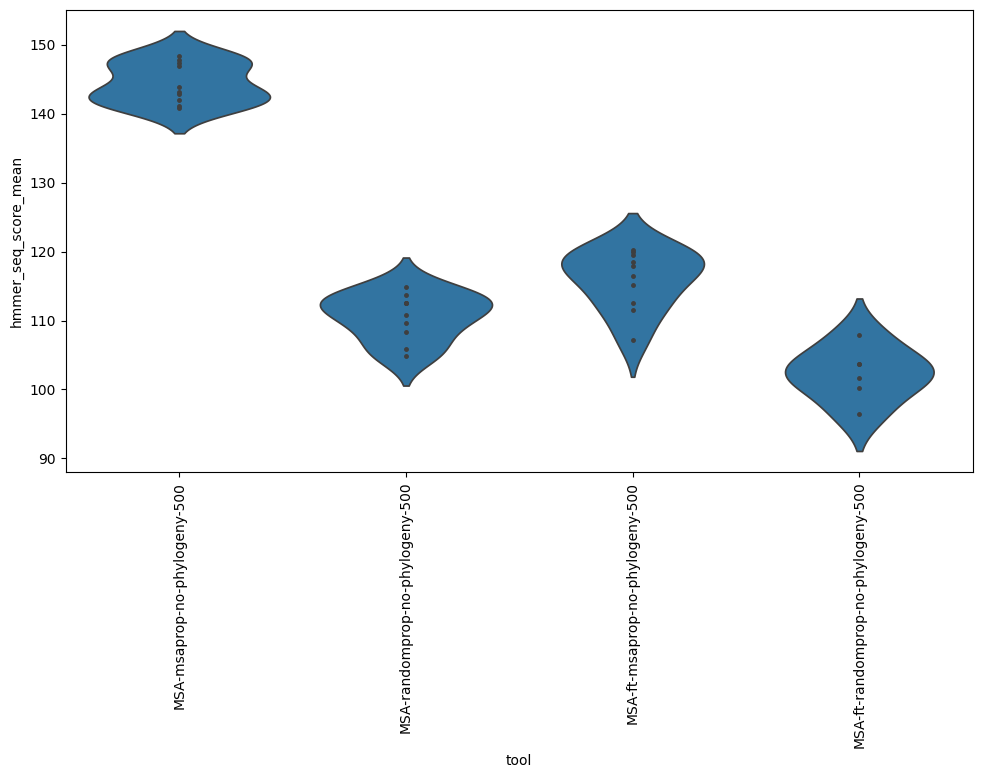

In [47]:
rcParams['figure.figsize'] = 11.7,6

fig = sns.violinplot(data = all_metrics_dataframe, y="hmmer_seq_score_mean", x="tool", inner="point")
plt.xticks(rotation=90)

# plt.savefig('hmmer_seq_score_mean.png')

plt.show()



## Statistical Energy Scores

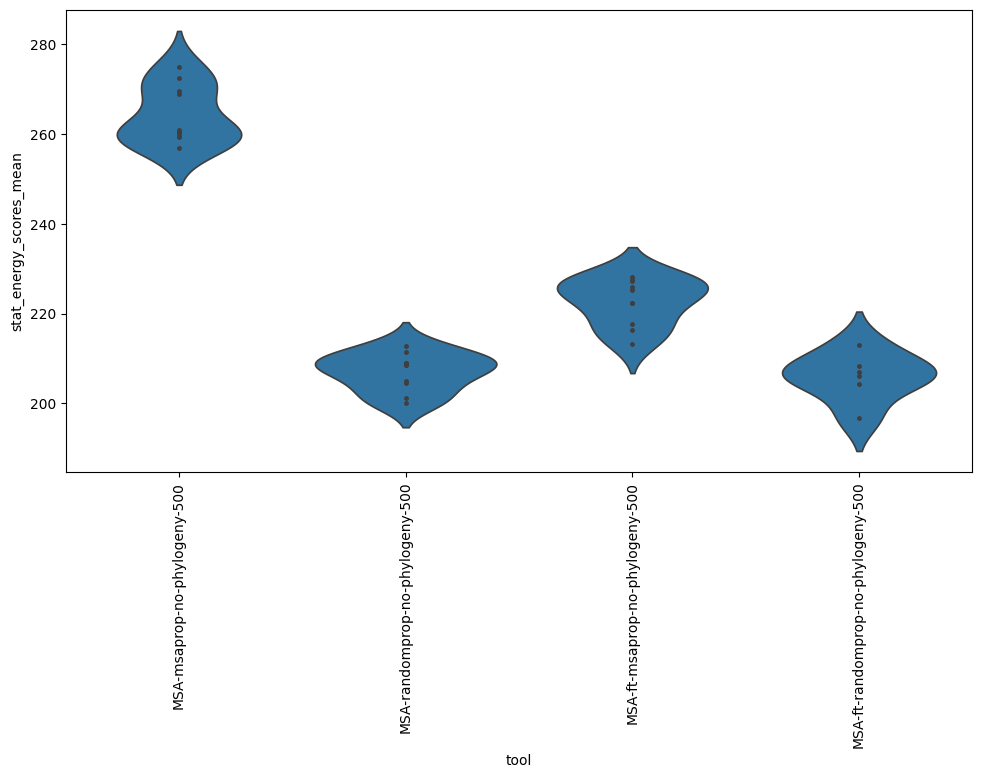

In [48]:
rcParams['figure.figsize'] = 11.7,6

fig = sns.violinplot(data = all_metrics_dataframe, y="stat_energy_scores_mean", x="tool", inner="point")
plt.xticks(rotation=90)

# plt.savefig('stat_energy_scores_mean.png')

plt.show()

## Average Minimum Distance to a Natural Sequence

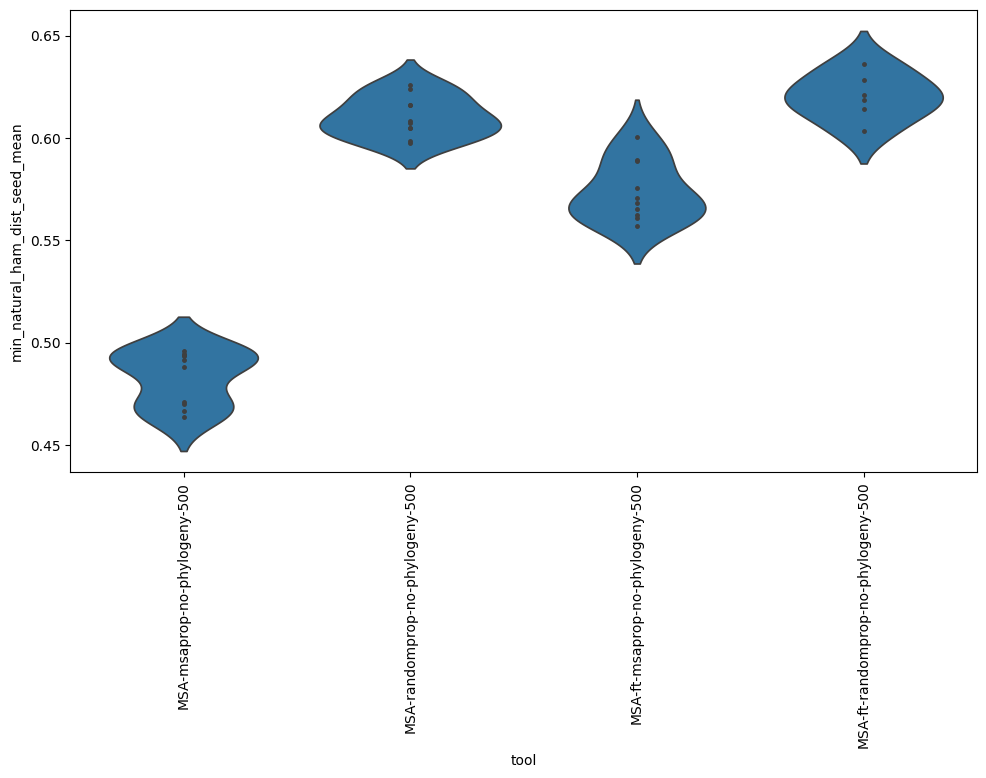

In [50]:
rcParams['figure.figsize'] = 11.7,6

fig = sns.violinplot(data = all_metrics_dataframe, y="min_natural_ham_dist_seed_mean", x="tool", inner="point")
plt.xticks(rotation=90)

# plt.savefig('min_natural_ham_dist_seed_mean.png')

plt.show()

## Average Maximum Distance within an MSA

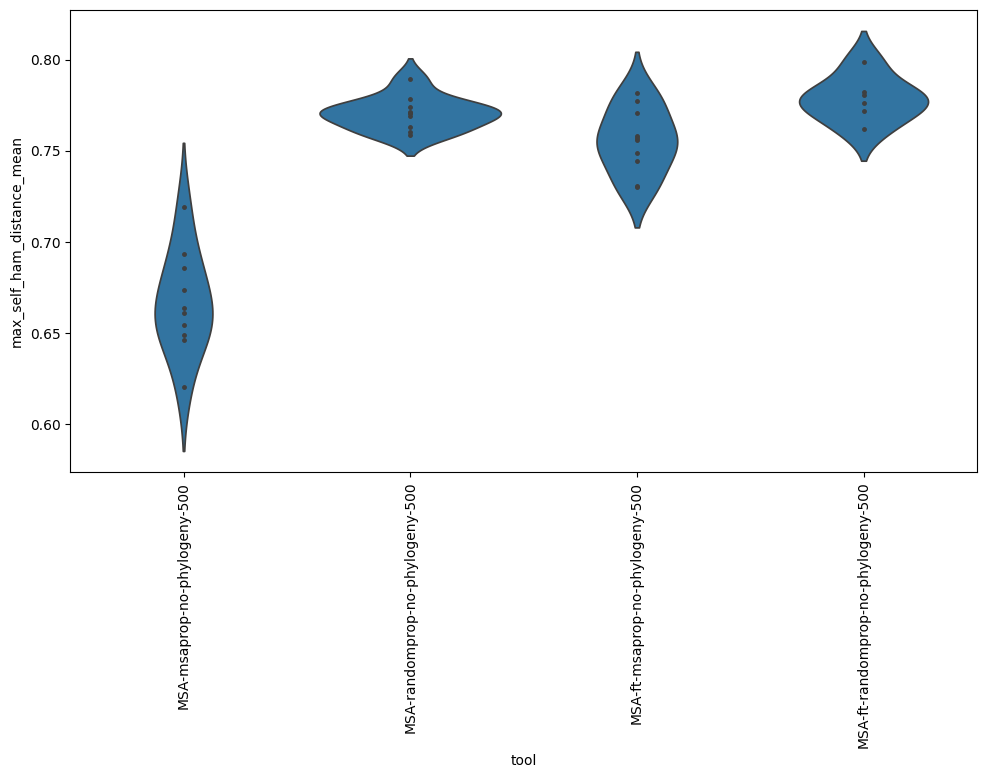

In [51]:
rcParams['figure.figsize'] = 11.7,6

fig = sns.violinplot(data = all_metrics_dataframe, y="max_self_ham_distance_mean", x="tool", inner="point")
plt.xticks(rotation=90)

# plt.savefig('max_self_ham_dist_seed_mean.png')

plt.show()

## Shannon Entropy Comparison (Simulated Vs Natural)

In [54]:
from scipy.stats import entropy

se_dataframe = pd.DataFrame(columns=["tool","sim_ind","column_number","shannon_entropy_sim","shannon_entropy_corr_nat"])


for j,folder in enumerate(scores_folders):
        
    for i,file in enumerate(os.listdir(folder)):

        if tool_types[j] == "nat":
            continue

        if tool_types[j] != "nat" and tool_types[j] != "full_sampling":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = 1
            
        file_path = os.path.join(folder,file)
        dist_dataframe = pd.DataFrame()
        
        df = pd.read_csv(file_path, delimiter="\t") 
        
        sim_array = pd.DataFrame([list(seq) for seq in df["sequence"]]) 
        nat_array = pd.DataFrame([list(seq) for seq in df["corr_nat_seq"]])

        entropy_df = []

        for k in range(sim_array.shape[1]):

            entropy_sim = entropy(sim_array.iloc[:,k].value_counts())
            entropy_nat = entropy(nat_array.iloc[:,k].value_counts())

            entropy_df.append({"tool":tool_types[j],"sim_ind": file_sim_ind, "column_number": k + 1, 
                               "shannon_entropy_sim":entropy_sim,"shannon_entropy_corr_nat":entropy_nat}) 

        entropy_df = pd.DataFrame(entropy_df)

        se_dataframe = pd.concat((se_dataframe, entropy_df)).reset_index(drop=True)

se_dataframe_stats = se_dataframe.groupby(["tool","column_number"]).describe().reset_index()
se_dataframe_stats.columns = ["tool","column_number"] + [f"{tup1}_{tup2}" for tup1, tup2 in list(se_dataframe_stats.columns)[2:]]
se_dataframe_stats = se_dataframe_stats.iloc[:,:12].drop("shannon_entropy_corr_nat_count", axis = 1).rename(columns  = {"shannon_entropy_corr_nat_mean":"shannon_entropy_corr_nat"})

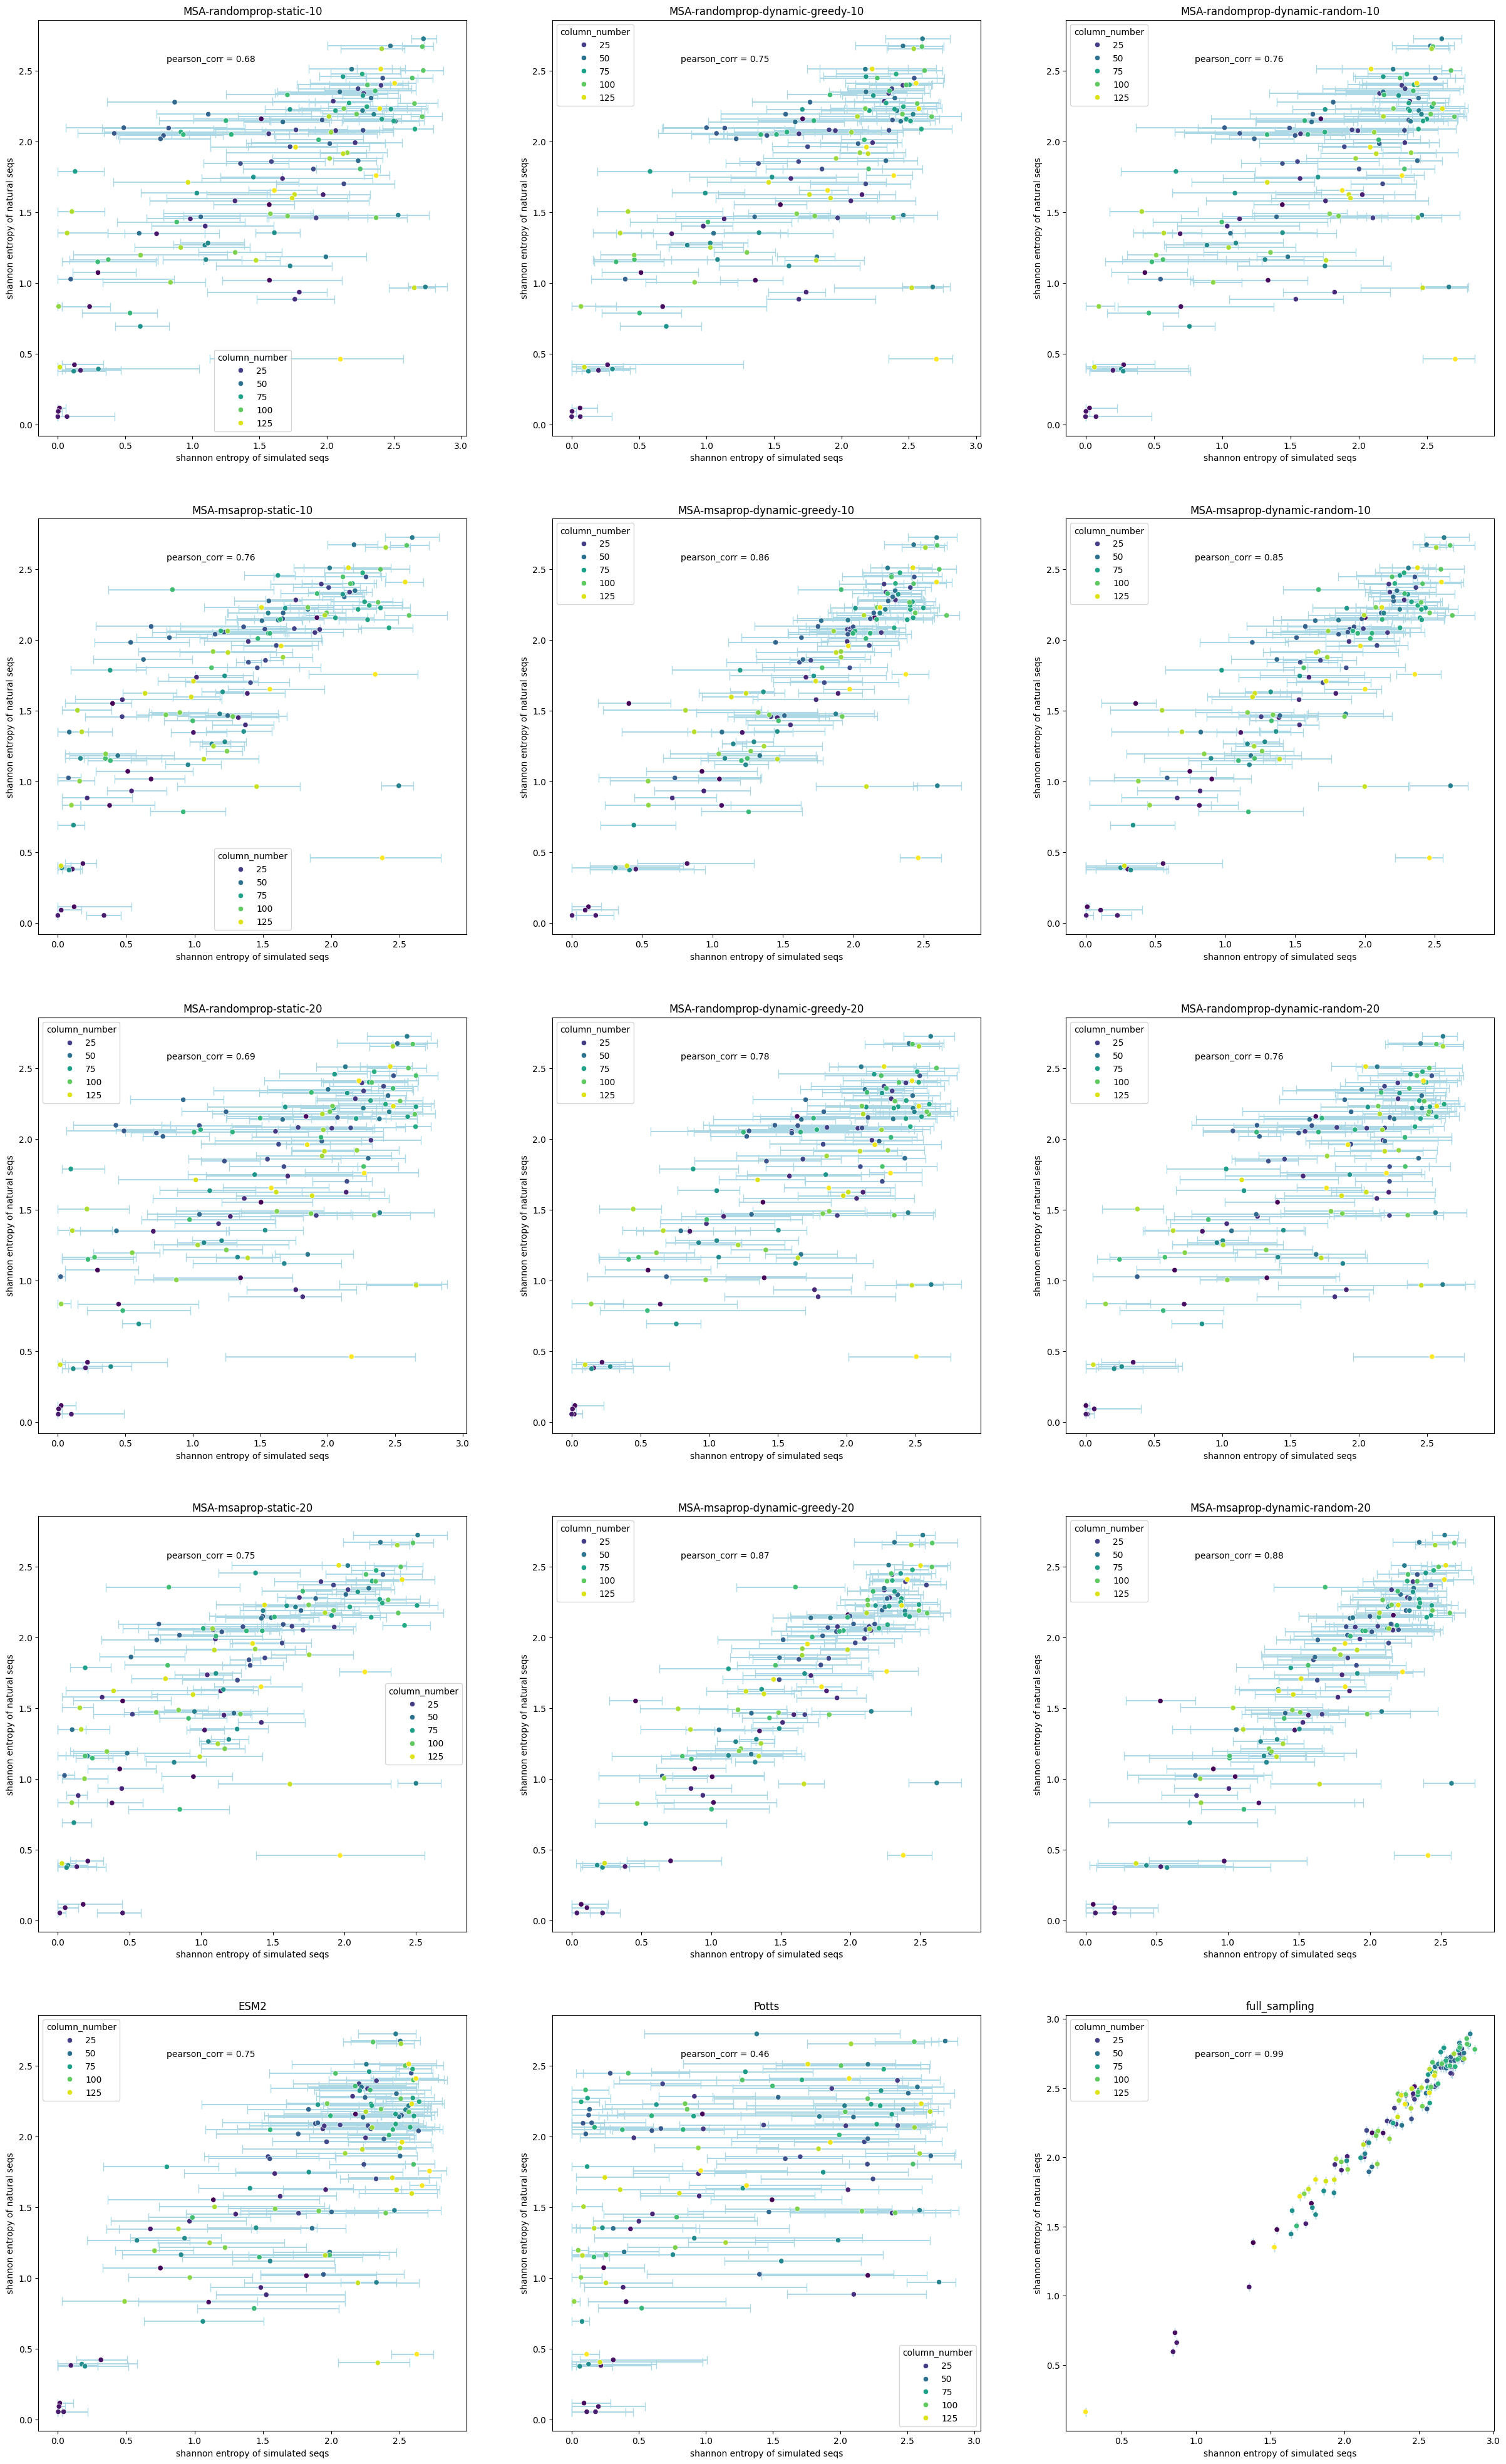

In [55]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import floor,ceil
import seaborn as sns

fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))

for k in range(len(tool_types)):

    if tool_types[k] == "nat":
        continue

    i = floor(k/3)
    j = k % 3

    main_dataframe_tool_sim_stats = se_dataframe_stats.loc[(se_dataframe_stats["tool"] == tool_types[k]), :]

    xerr_min = main_dataframe_tool_sim_stats["shannon_entropy_sim_mean"] - main_dataframe_tool_sim_stats["shannon_entropy_sim_min"]
    xerr_max = main_dataframe_tool_sim_stats["shannon_entropy_sim_max"] - main_dataframe_tool_sim_stats["shannon_entropy_sim_mean"]
    std_dev = main_dataframe_tool_sim_stats["shannon_entropy_sim_std"].copy()

    axes[i][j].errorbar(main_dataframe_tool_sim_stats["shannon_entropy_sim_mean"], main_dataframe_tool_sim_stats["shannon_entropy_corr_nat"],
                      xerr = [xerr_min,xerr_max], fmt = "none", ecolor = "lightblue",  capsize = 5, zorder = 1)
    
    axes[i][j].set_title(tool_types[k])
    axes[i][j].set_xlabel("shannon entropy of simulated seqs")
    axes[i][j].set_ylabel("shannon entropy of natural seqs")
    pearson_corr = pearsonr(main_dataframe_tool_sim_stats["shannon_entropy_sim_mean"], main_dataframe_tool_sim_stats["shannon_entropy_corr_nat"])
    axes[i][j].annotate(f"pearson_corr = {pearson_corr.statistic:.2f}",xy = (0.3,0.9), xycoords = "axes fraction")

    sns.scatterplot(x = "shannon_entropy_sim_mean", y = "shannon_entropy_corr_nat", 
                               data = main_dataframe_tool_sim_stats, hue = "column_number", palette = "viridis", ax=axes[i][j], alpha = 1)

plt.savefig("shannon_entropy_scatterplots_error_bars.png")

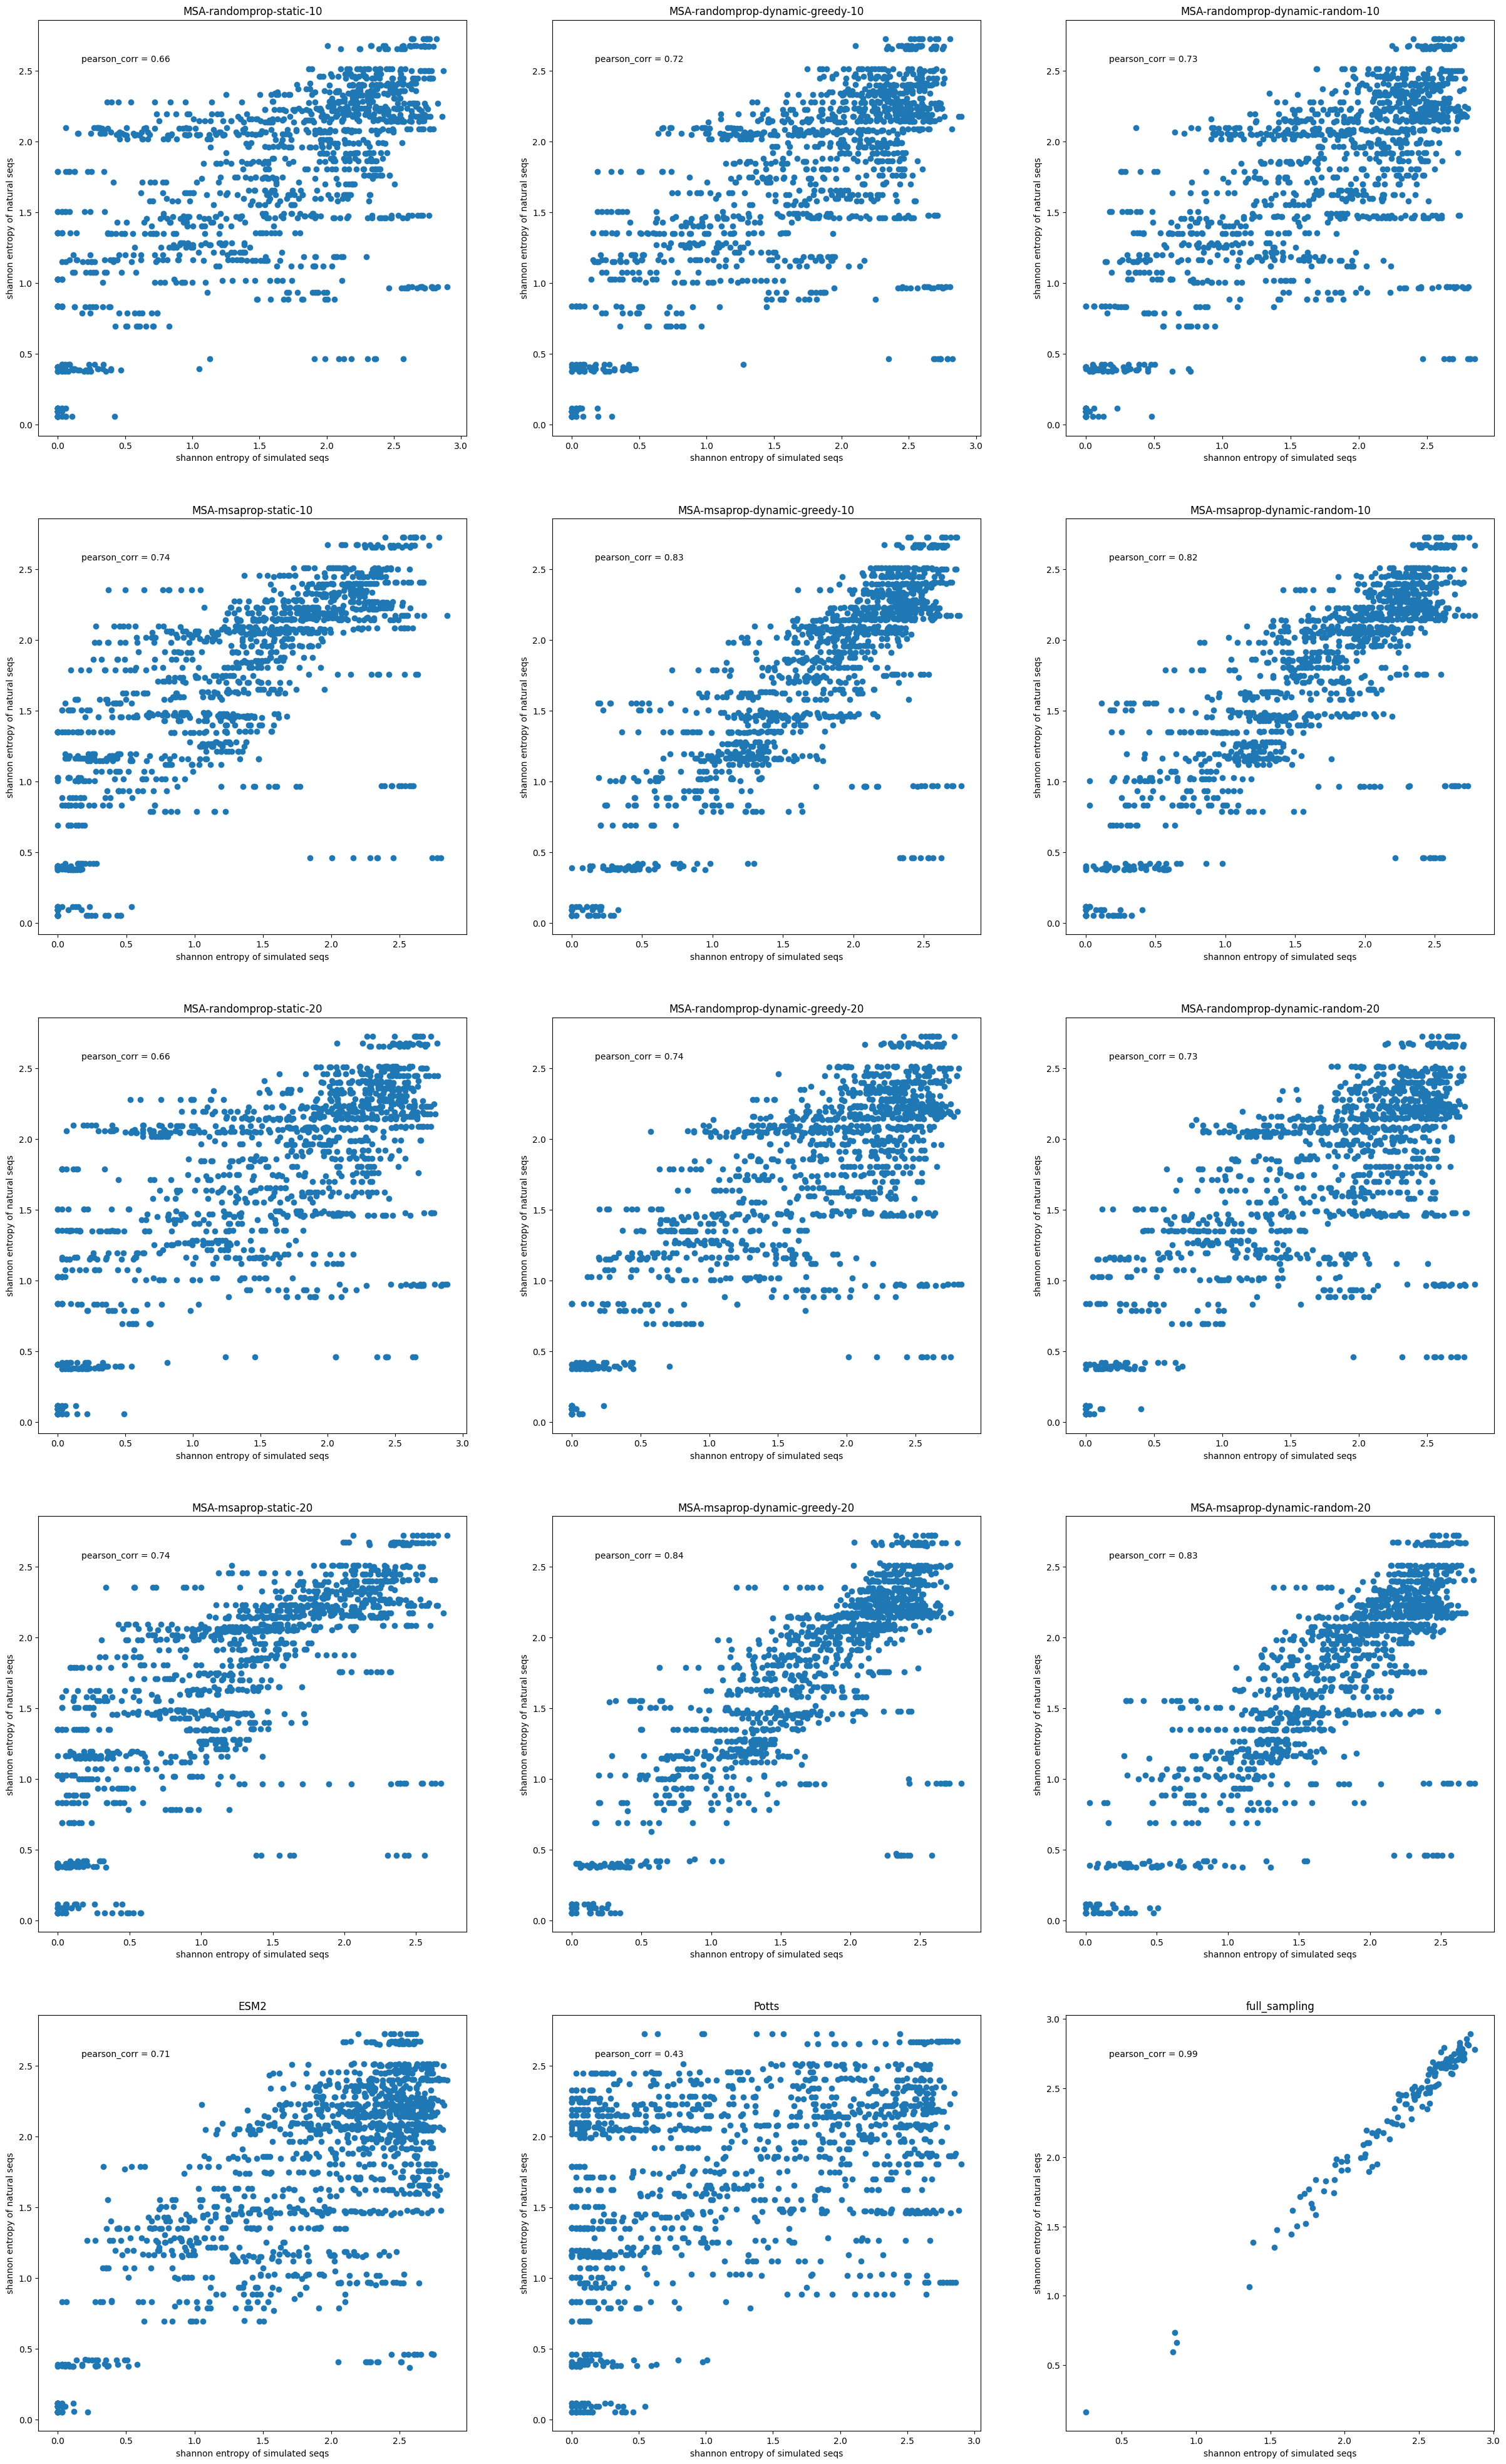

In [56]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import floor,ceil

fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))
# sim_ind = 2

for k in range(len(tool_types)):

    if tool_types[k] == "nat":
        continue

    i = floor(k/3)
    j = k % 3
    
    main_dataframe_tool_sim = se_dataframe.loc[(se_dataframe["tool"] == tool_types[k]), :]
    # sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde')
axes[i][j].scatter(main_dataframe_tool_sim["shannon_entropy_sim"], main_dataframe_tool_sim["shannon_entropy_corr_nat"])
    axes[i][j].set_title(tool_types[k])
    axes[i][j].set_xlabel("shannon entropy of simulated seqs")
    axes[i][j].set_ylabel("shannon entropy of natural seqs")
    pearson_corr = pearsonr(main_dataframe_tool_sim["shannon_entropy_sim"], main_dataframe_tool_sim["shannon_entropy_corr_nat"])
    axes[i][j].annotate(f"pearson_corr = {pearson_corr.statistic:.2f}",xy = (0.1,0.9), xycoords = "axes fraction")

    # values = np.vstack([main_dataframe_tool_sim["shannon_entropy_sim"], main_dataframe_tool_sim["shannon_entropy_corr_nat"])
    # kernel = stats.gaussian_kde(values)(values)
    # sns.scatterplot(
    #     data=tips,
    #     x="shannon_entropy_sim",
    #     y="shannon_entropy_corr_nat",
    #     # c=kernel,
    #     cmap="viridis",
    #     ax=axes[i][j],
    # )
    sns.jointplot(

    

plt.savefig("shannon_entropy_scatterplots.png")

## Mutual Information

In [57]:
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
from tqdm.notebook import tqdm, trange

mi_dataframe = pd.DataFrame(columns=["tool","sim_ind","column_number","mi_sim","mi_corr_nat"])
sim_ind = 4

for j,folder in enumerate(scores_folders):

    files_list = os.listdir(folder)
    
    for i,file in tqdm(enumerate(files_list)):

        if tool_types[j] != "nat" and tool_types[j] != "full_sampling":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = sim_ind

        if tool_types[j] == "nat":
            continue
        
        if file_sim_ind != sim_ind:
            continue
            
        file_path = os.path.join(folder,file)
        dist_dataframe = pd.DataFrame()
        
        df = pd.read_csv(file_path, delimiter="\t") 
        
        sim_array = pd.DataFrame([list(seq) for seq in df["sequence"]]) 
        nat_array = pd.DataFrame([list(seq) for seq in df["corr_nat_seq"]])

        mi_df = []

        for k in range(sim_array.shape[1]):

            for l in range(k + 1, sim_array.shape[1]):

                mi_sim = mutual_info_score(list(sim_array.iloc[:,k]),list(sim_array.iloc[:,l]))
                mi_nat = mutual_info_score(list(nat_array.iloc[:,k]),list(nat_array.iloc[:,l]))
    
                mi_df.append({"tool":tool_types[j],"sim_ind": file_sim_ind, "column_numbers": (k + 1, l +1), 
                                   "mi_sim":mi_sim,"mi_nat": mi_nat}) 

        mi_df = pd.DataFrame(mi_df) 

        mi_dataframe = pd.concat((mi_dataframe, mi_df)).reset_index(drop=True)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [60]:
main_dataframe_tool_sim

tool sim_ind column_number    mi_sim mi_corr_nat  \
121044  full_sampling       4           NaN  0.471697         NaN   
121045  full_sampling       4           NaN  0.343444         NaN   
121046  full_sampling       4           NaN  0.431793         NaN   
121047  full_sampling       4           NaN  0.268148         NaN   
121048  full_sampling       4           NaN  0.415158         NaN   
...               ...     ...           ...       ...         ...   
129685  full_sampling       4           NaN  0.628098         NaN   
129686  full_sampling       4           NaN  0.085514         NaN   
129687  full_sampling       4           NaN  0.548949         NaN   
129688  full_sampling       4           NaN  0.065100         NaN   
129689  full_sampling       4           NaN  0.082940         NaN   

       column_numbers    mi_nat  
121044         (1, 2)  0.446274  
121045         (1, 3)  0.327742  
121046         (1, 4)  0.463902  
121047         (1, 5)  0.266634  
121048         (1, 6)  0.437830  
...               ...       ...  
129685     (129, 131)  0.584125  
129686     (129, 132)  0.057115  
129687     (130, 131)  0.493306  
129688     (130, 132)  0.057454  
129689     (131, 132)  0.053187  

[8646 rows x 7 columns]

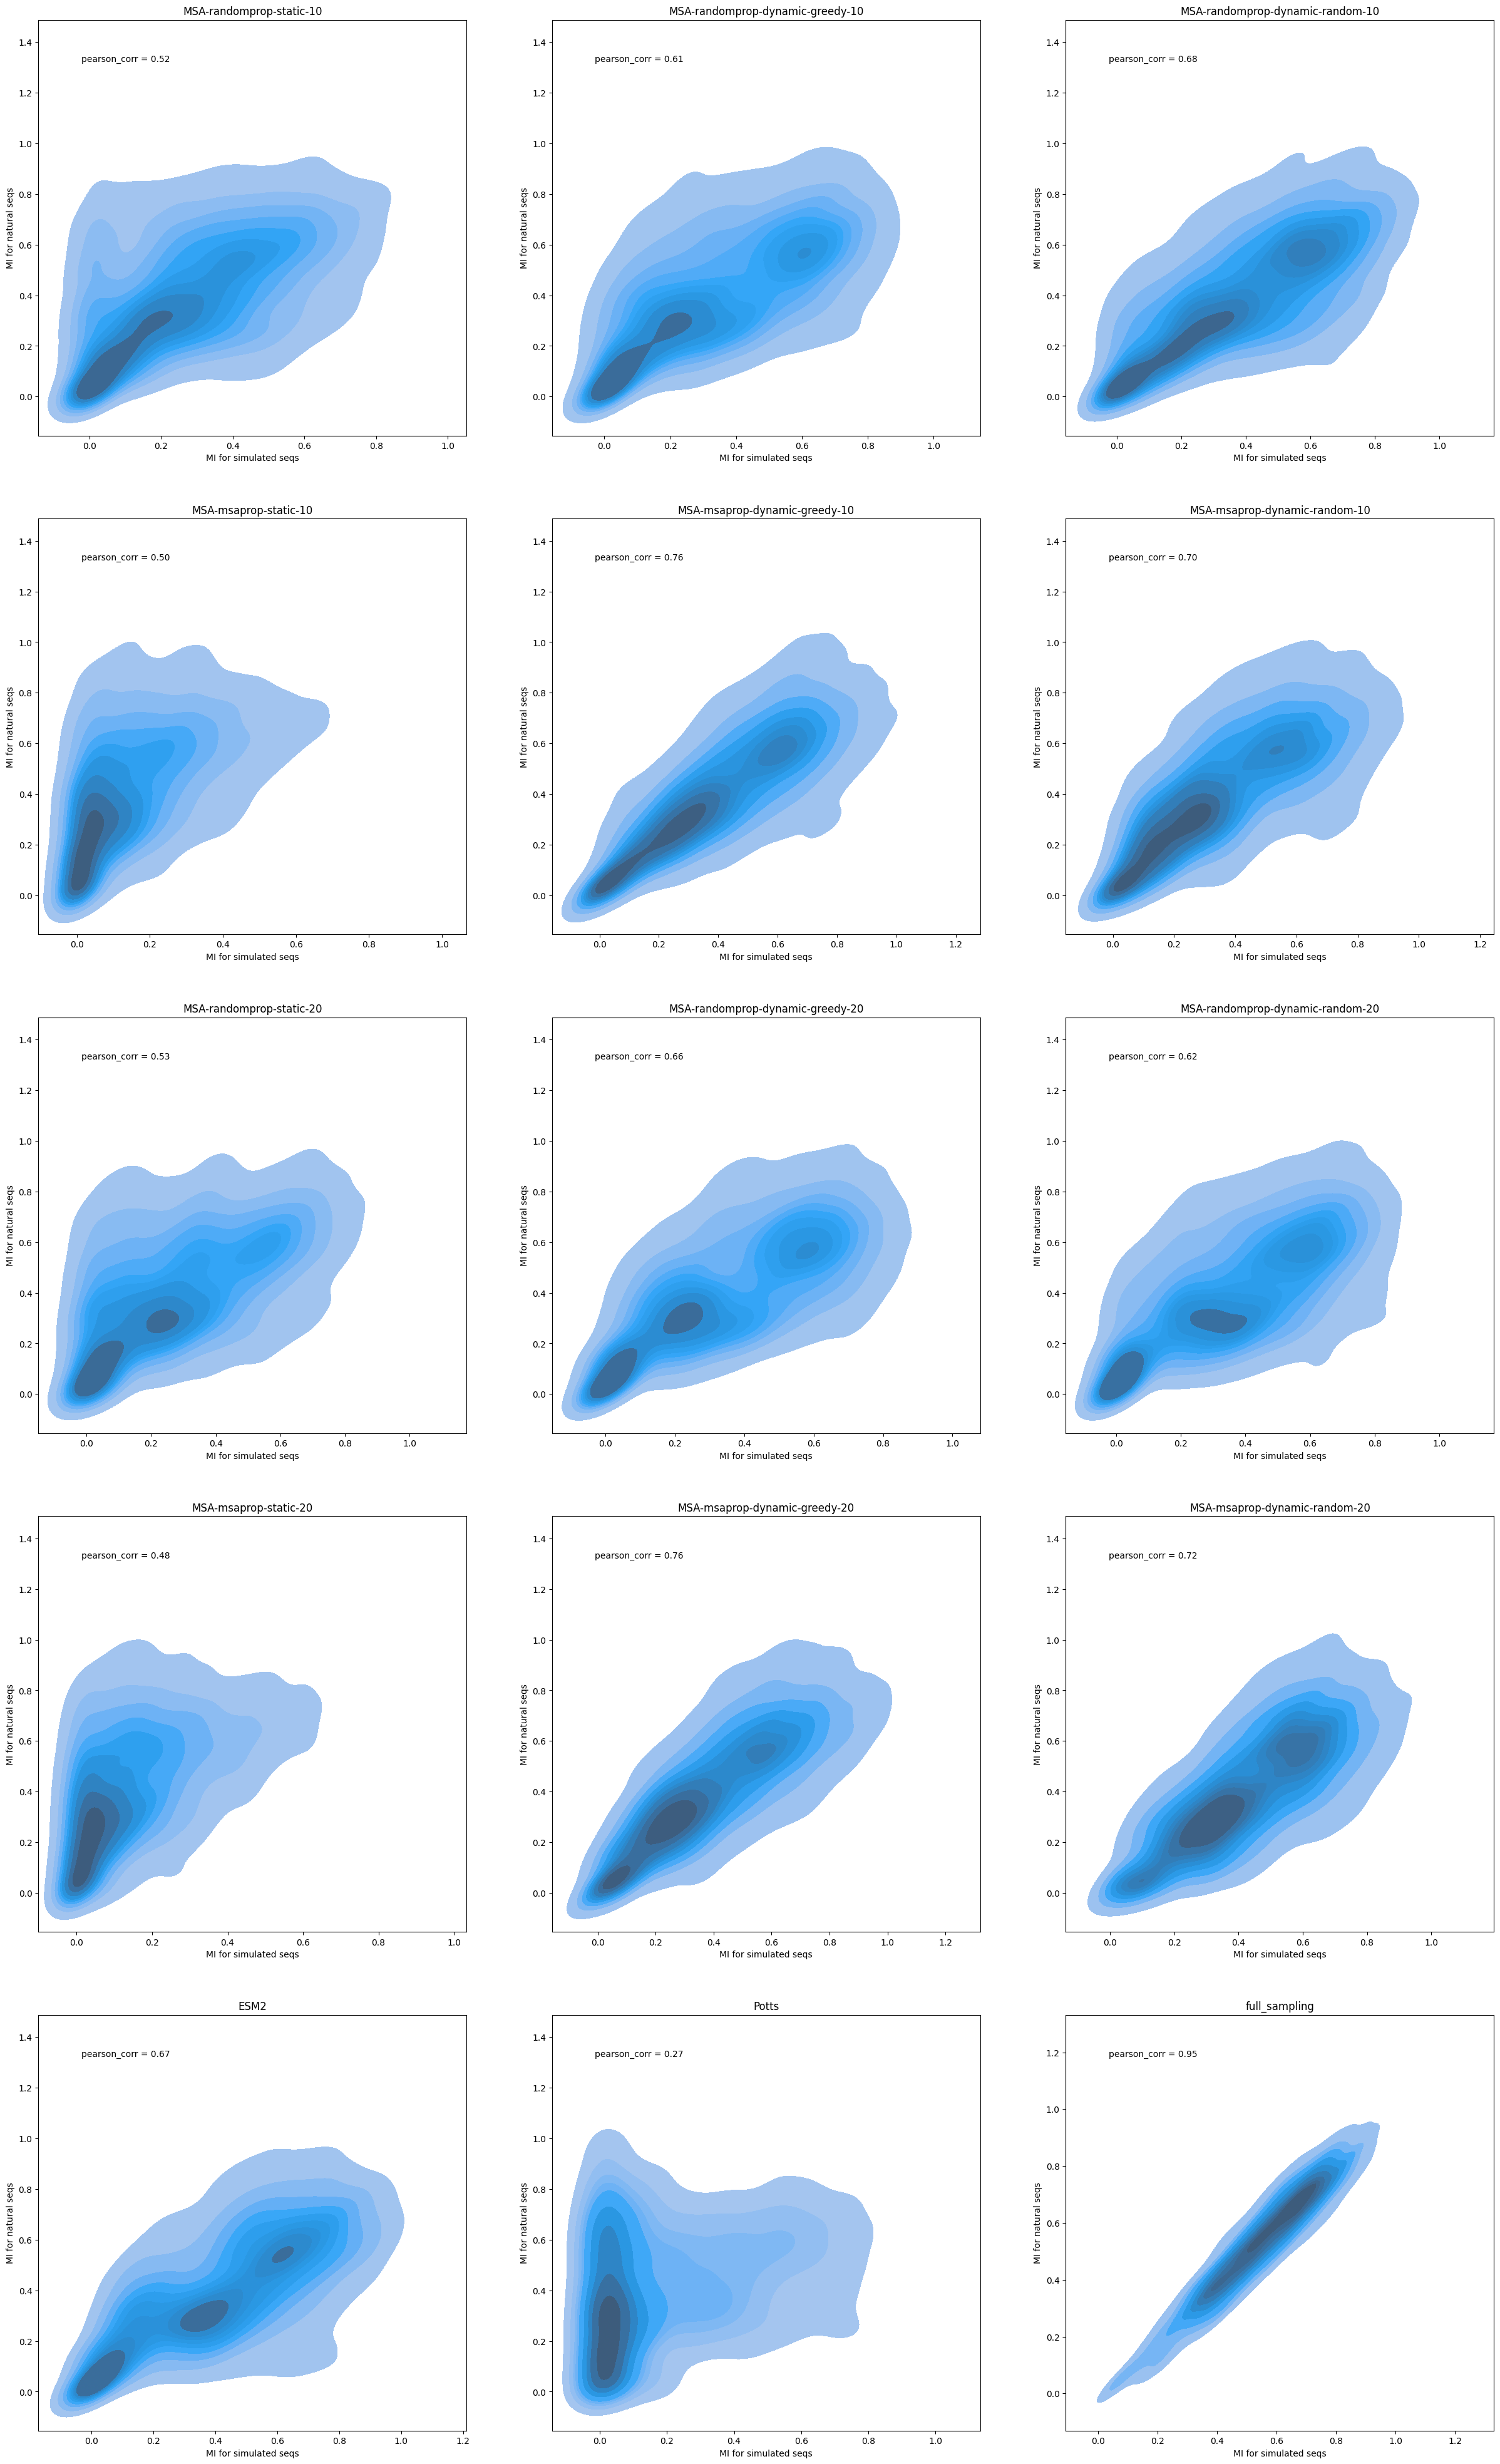

In [63]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import floor,ceil

fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))
# sim_ind = 1

for k in range(len(tool_types)):

    if tool_types[k] == "nat":
        continue

    i = floor(k/3)
    j = k % 3
    
    main_dataframe_tool_sim = mi_dataframe.loc[(mi_dataframe["tool"] == tool_types[k]) , :]
    # axes[i][j].scatter(main_dataframe_tool_sim["mi_sim"], main_dataframe_tool_sim["mi_nat"])
    axes[i][j].set_title(tool_types[k])
    axes[i][j].set_xlabel("MI for simulated seqs")
    axes[i][j].set_ylabel("MI for natural seqs")
    pearson_corr = pearsonr(main_dataframe_tool_sim["mi_sim"], main_dataframe_tool_sim["mi_nat"])
    axes[i][j].annotate(f"pearson_corr = {pearson_corr.statistic:.2f}",xy = (0.1,0.9), xycoords = "axes fraction")

    # values = np.vstack([main_dataframe_tool_sim["mi_sim"], main_dataframe_tool_sim["mi_nat"]])
    # kernel = stats.gaussian_kde(values)(values)
    # sns.scatterplot(
    #     data=tips,
    #     x="mi_sim",
    #     y="mi_nat",
    #     c=kernel,
    #     cmap="viridis",
    #     ax=axes[i][j],
    # )
    sns.kdeplot(data = main_dataframe_tool_sim, x="mi_sim",y="mi_nat",fill=True, ax=axes[i][j])

plt.savefig(f"MI_scatterplots_sim_{sim_ind}.png")

## Hamming Distance Between Tree Leaves Comparison  (Simulated vs Natural)

In [66]:
hd_dataframe = pd.DataFrame(columns=["tool","sim_ind","ham_dist_sim","ham_dist_corr_nat"])
sim_ind = 1

for j,folder in enumerate(scores_folders):
        
    for i,file in enumerate(os.listdir(folder)):

        if tool_types[j] == "nat" and file == "PF00004_seed.fasta":
            continue

        if tool_types[j] != "nat" and tool_types[j] != "full_sampling":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = sim_ind

        if file_sim_ind != sim_ind:
            continue
            
        file_path = os.path.join(folder,file)
        dist_dataframe = pd.DataFrame()
        
        df = pd.read_csv(file_path, delimiter="\t") 
        
        num_sim_array = np.array([list(seq) for seq in df["sequence"]], dtype=np.bytes_).view(np.uint8)
        
        distance_matrix_sim = cdist(num_sim_array,num_sim_array, "hamming")
        pairwise_distances_sim = distance_matrix_sim[np.triu_indices_from(distance_matrix_sim, k=1)]

        num_nat_array = np.array([list(seq) for seq in df["corr_nat_seq"]], dtype=np.bytes_).view(np.uint8)
        
        distance_matrix_nat = cdist(num_nat_array,num_nat_array, "hamming")
        pairwise_distances_nat = distance_matrix_nat[np.triu_indices_from(distance_matrix_nat, k=1)]

        dist_dataframe["ham_dist_sim"] = list(pairwise_distances_sim)
        dist_dataframe["ham_dist_corr_nat"] = list(pairwise_distances_nat)
        dist_dataframe["tool"] = tool_types[j]
        dist_dataframe["sim_ind"] = file_sim_ind

        hd_dataframe = pd.concat((hd_dataframe, dist_dataframe)).reset_index(drop=True)

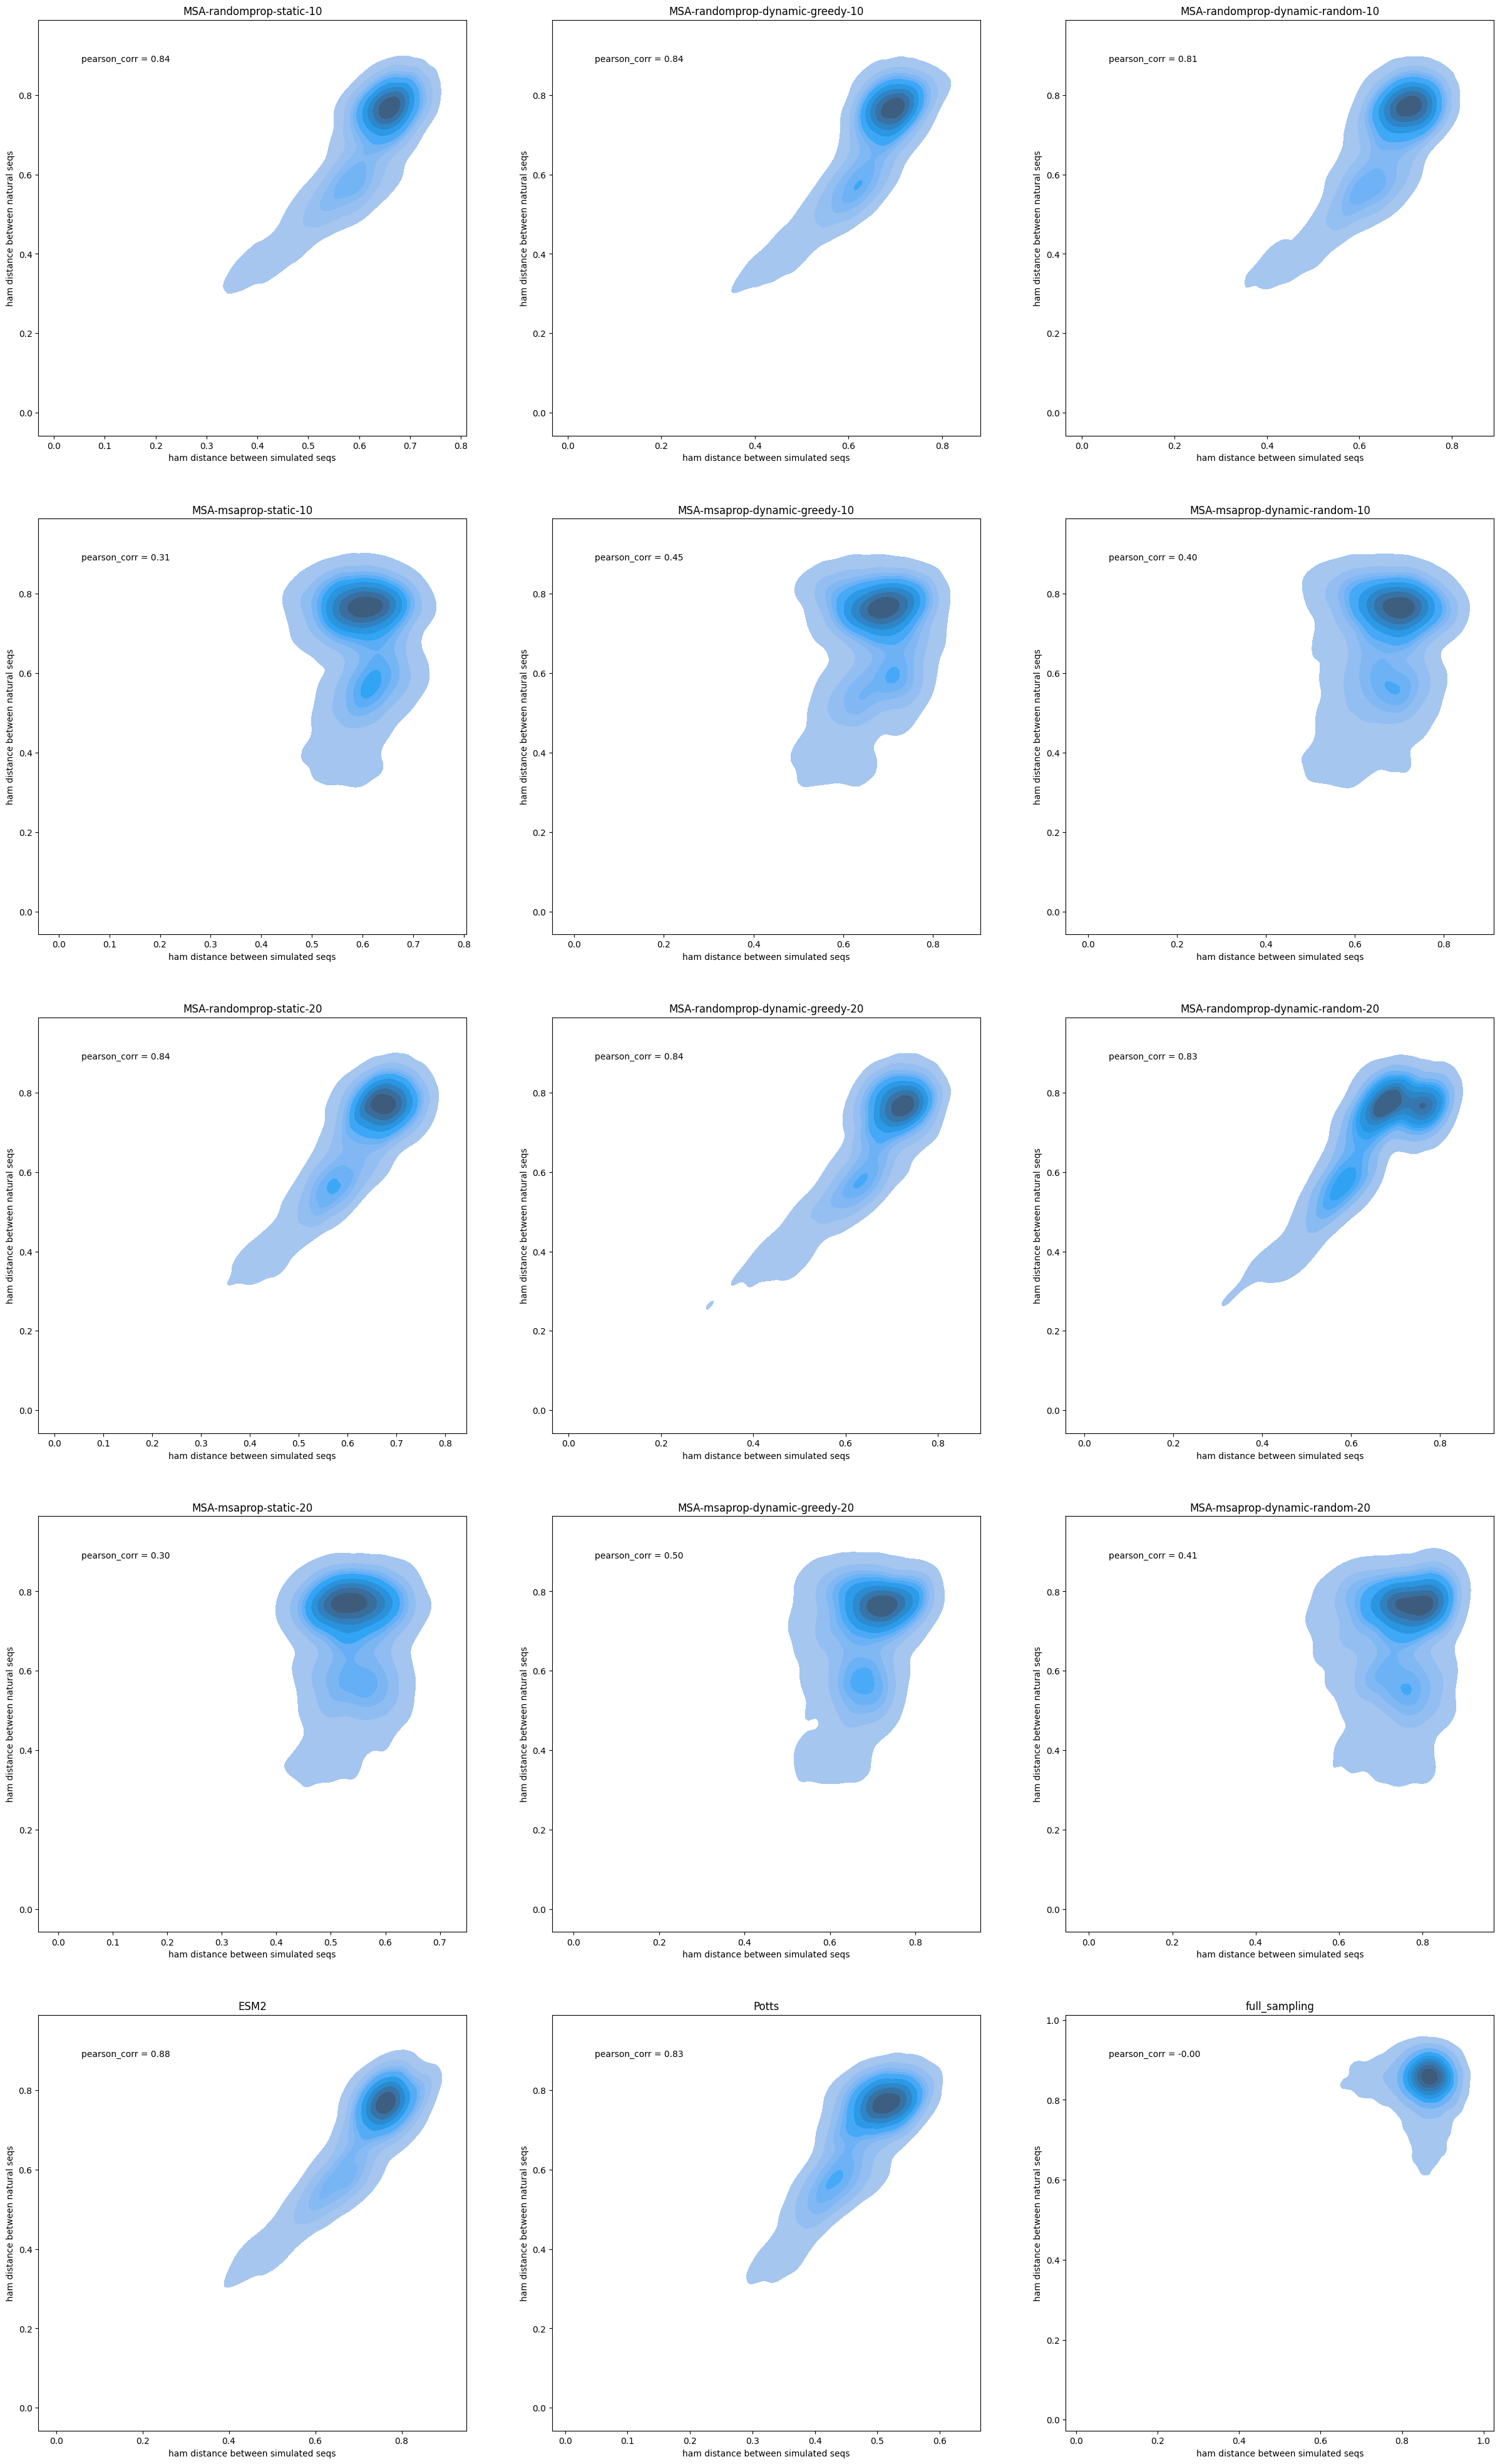

In [68]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import floor,ceil
from scipy import stats


fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))

for k in range(len(tool_types)):

    if tool_types[k] == "nat":
        continue

    i = floor(k/3)
    j = k % 3
    
    main_dataframe_tool_sim = hd_dataframe.loc[(hd_dataframe["tool"] == tool_types[k]) & (hd_dataframe["sim_ind"] == sim_ind), :]
    # axes[i][j].scatter(main_dataframe_tool_sim["ham_dist_sim"], main_dataframe_tool_sim["ham_dist_corr_nat"])
    axes[i][j].set_title(tool_types[k])
    axes[i][j].set_xlabel("ham distance between simulated seqs")
    axes[i][j].set_ylabel("ham distance between natural seqs")
    pearson_corr = pearsonr(main_dataframe_tool_sim["ham_dist_sim"], main_dataframe_tool_sim["ham_dist_corr_nat"])
    axes[i][j].annotate(f"pearson_corr = {pearson_corr.statistic:.2f}",xy = (0.1,0.9), xycoords = "axes fraction")

    # values = np.vstack([main_dataframe_tool_sim["ham_dist_sim"], main_dataframe_tool_sim["ham_dist_corr_nat"]])
    # kernel = stats.gaussian_kde(values)(values)
    # sns.scatterplot(
    #     data=main_dataframe_tool_sim,
    #     x="ham_dist_sim",
    #     y="ham_dist_corr_nat",
    #     ax=axes[i][j],
    # )

    sns.kdeplot(
        data=main_dataframe_tool_sim,
        x="ham_dist_sim",
        y="ham_dist_corr_nat",
        fill=True,
        ax=axes[i][j],
    )

plt.savefig("ham_distances_scatterplots.png")

## Hamming Distance Distributions

In [40]:
hd_dist_dataframe = pd.DataFrame(columns=["tool","sim_ind","ham_dist"])

for j,folder in enumerate(scores_folders):
        
    for i,file in enumerate(os.listdir(folder)):

        if tool_types[j] != "nat":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = 1

        file_path = os.path.join(folder,file)
        dist_dataframe = pd.DataFrame()
        
        df = pd.read_csv(file_path, delimiter="\t") 
        num_seq_array = np.array([list(seq) for seq in df["sequence"]], dtype=np.bytes_).view(np.uint8)
        
        distance_matrix = cdist(num_seq_array,num_seq_array, "hamming")
        pairwise_distances = np.triu(distance_matrix).flatten()
        mask = pairwise_distances != 0
        pairwise_distances = pairwise_distances[mask]

        dist_dataframe["ham_dist"] = list(pairwise_distances)
        dist_dataframe["tool"] = tool_types[j]
        dist_dataframe["sim_ind"] = file_sim_ind

        main_dataframe = pd.concat((main_dataframe, dist_dataframe))

In [18]:
sim_number = 1

hd_dist_dataframe.loc[hd_dist_dataframe["tool"] == "nat","sim_ind"] = sim_number
hd_dist_dataframe_one_sim = main_dataframe.loc[main_dataframe["sim_ind"] == sim_number, :]

fig = px.violin(main_dataframe_one_sim, y="ham_dist", x="tool",color = "sim_ind", box = True, points = False)
fig.show()

## Contact Prediction Analysis

In [25]:
from typing import List, Tuple, Optional, Dict, NamedTuple, Union, Callable
import itertools
import os
import string
from pathlib import Path

import numpy as np
import torch
from scipy.spatial.distance import squareform, pdist, cdist
import matplotlib.pyplot as plt
import matplotlib as mpl
from Bio import SeqIO
import biotite.structure as bs
from biotite.structure.io.pdbx import PDBxFile, get_structure
from biotite.database import rcsb
from tqdm import tqdm
import pandas as pd

import esm

torch.set_grad_enabled(False)

def plot_contacts_and_predictions(
    predictions: Union[torch.Tensor, np.ndarray],
    contacts: Union[torch.Tensor, np.ndarray],
    ax: Optional[mpl.axes.Axes] = None,
    # artists: Optional[ContactAndPredictionArtists] = None,
    cmap: str = "Blues",
    ms: float = 1,
    title: Union[bool, str, Callable[[float], str]] = True,
    animated: bool = False,
) -> None:

    if isinstance(predictions, torch.Tensor):
        predictions = predictions.detach().cpu().numpy()
    if isinstance(contacts, torch.Tensor):
        contacts = contacts.detach().cpu().numpy()
    if ax is None:
        ax = plt.gca()

    seqlen = contacts.shape[0]
    relative_distance = np.add.outer(-np.arange(seqlen), np.arange(seqlen))
    bottom_mask = relative_distance < 0
    masked_image = np.ma.masked_where(bottom_mask, predictions)
    invalid_mask = np.abs(np.add.outer(np.arange(seqlen), -np.arange(seqlen))) < 6
    
    predictions = predictions.copy()
    predictions[invalid_mask] = float("-inf")
    topl_val_pred = np.sort(predictions.reshape(-1))[-seqlen]
    pred_contacts = predictions >= topl_val_pred

    # contacts = contacts.copy()
    # contacts[invalid_mask] = float("-inf")
    # topl_val_contacts = np.sort(contacts.reshape(-1))[-seqlen]
    # contacts = contacts >= topl_val_contacts
    # contacts = np.ma.masked_where(bottom_mask, contacts)
    
    true_positives = contacts & pred_contacts & ~bottom_mask
    false_positives = ~contacts & pred_contacts & ~bottom_mask
    other_contacts = contacts & ~pred_contacts & ~bottom_mask

    if isinstance(title, str):
        title_text: Optional[str] = title
    elif title:
        long_range_pl = compute_precisions(predictions, contacts, minsep=24)[
            "P@L"
        ].item()
        if callable(title):
            title_text = title(long_range_pl)
        else:
            title_text = f"Long Range P@L: {100 * long_range_pl:0.1f}"
    else:
        title_text = None

    img = ax.imshow(contacts, cmap=cmap, animated=animated)
    oc = ax.plot(*np.where(other_contacts), "o", c="grey", ms=ms)[0]
    fn = ax.plot(*np.where(false_positives), "o", c="r", ms=ms)[0]
    tp = ax.plot(*np.where(true_positives), "o", c="b", ms=ms)[0]
    ti = ax.set_title(title_text) if title_text is not None else None
    # artists = ContactAndPredictionArtists(img, oc, fn, tp, ti)

    ax.axis("square")
    ax.set_xlim([0, seqlen])
    ax.set_ylim([0, seqlen])


In [26]:
def extend(a, b, c, L, A, D):
    """
    input:  3 coords (a,b,c), (L)ength, (A)ngle, and (D)ihedral
    output: 4th coord
    """

    def normalize(x):
        return x / np.linalg.norm(x, ord=2, axis=-1, keepdims=True)

    bc = normalize(b - c)
    n = normalize(np.cross(b - a, bc))
    m = [bc, np.cross(n, bc), n]
    d = [L * np.cos(A), L * np.sin(A) * np.cos(D), -L * np.sin(A) * np.sin(D)]
    return c + sum([m * d for m, d in zip(m, d)])


def contacts_from_pdb(
    structure: bs.AtomArray,
    distance_threshold: float = 8.0,
    chain: Optional[str] = None,
) -> np.ndarray:
    mask = ~structure.hetero
    if chain is not None:
        mask &= structure.chain_id == chain

    N = structure.coord[mask & (structure.atom_name == "N")]
    CA = structure.coord[mask & (structure.atom_name == "CA")]
    C = structure.coord[mask & (structure.atom_name == "C")]

    Cbeta = extend(C, N, CA, 1.522, 1.927, -2.143)
    dist = squareform(pdist(Cbeta))
    
    contacts = dist < distance_threshold
    contacts = contacts.astype(np.int64)
    contacts[np.isnan(dist)] = -1
    return contacts

def compute_precisions(
    predictions: torch.Tensor,
    targets: torch.Tensor,
    src_lengths: Optional[torch.Tensor] = None,
    minsep: int = 6,
    maxsep: Optional[int] = None,
    override_length: Optional[int] = None,  # for casp
):
    if isinstance(predictions, np.ndarray):
        predictions = torch.from_numpy(predictions)
    if isinstance(targets, np.ndarray):
        targets = torch.from_numpy(targets)
    if predictions.dim() == 2:
        predictions = predictions.unsqueeze(0)
    if targets.dim() == 2:
        targets = targets.unsqueeze(0)
    override_length = (targets[0, 0] >= 0).sum()

    # Check sizes
    if predictions.size() != targets.size():
        raise ValueError(
            f"Size mismatch. Received predictions of size {predictions.size()}, "
            f"targets of size {targets.size()}"
        )
    device = predictions.device

    batch_size, seqlen, _ = predictions.size()
    seqlen_range = torch.arange(seqlen, device=device)

    sep = seqlen_range.unsqueeze(0) - seqlen_range.unsqueeze(1)
    sep = sep.unsqueeze(0)
    valid_mask = sep >= minsep
    valid_mask = valid_mask & (targets >= 0)  # negative targets are invalid

    if maxsep is not None:
        valid_mask &= sep < maxsep

    if src_lengths is not None:
        valid = seqlen_range.unsqueeze(0) < src_lengths.unsqueeze(1)
        valid_mask &= valid.unsqueeze(1) & valid.unsqueeze(2)
    else:
        src_lengths = torch.full([batch_size], seqlen, device=device, dtype=torch.long)

    predictions = predictions.masked_fill(~valid_mask, float("-inf"))

    x_ind, y_ind = np.triu_indices(seqlen, minsep)
    predictions_upper = predictions[:, x_ind, y_ind]
    targets_upper = targets[:, x_ind, y_ind]

    topk = seqlen if override_length is None else max(seqlen, override_length)
    indices = predictions_upper.argsort(dim=-1, descending=True)[:, :topk]
    topk_targets = targets_upper[torch.arange(batch_size).unsqueeze(1), indices]
    if topk_targets.size(1) < topk:
        topk_targets = F.pad(topk_targets, [0, topk - topk_targets.size(1)])

    cumulative_dist = topk_targets.type_as(predictions).cumsum(-1)

    gather_lengths = src_lengths.unsqueeze(1)
    if override_length is not None:
        gather_lengths = override_length * torch.ones_like(
            gather_lengths, device=device
        )

    gather_indices = (
        torch.arange(0.1, 1.1, 0.1, device=device).unsqueeze(0) * gather_lengths
    ).type(torch.long) - 1

    binned_cumulative_dist = cumulative_dist.gather(1, gather_indices)
    binned_precisions = binned_cumulative_dist / (gather_indices + 1).type_as(
        binned_cumulative_dist
    )

    pl5 = binned_precisions[:, 1]
    pl2 = binned_precisions[:, 4]
    pl = binned_precisions[:, 9]
    auc = binned_precisions.mean(-1)

    return {"AUC": auc, "P@L": pl, "P@L2": pl2, "P@L5": pl5}


def evaluate_prediction(
    predictions: torch.Tensor,
    targets: torch.Tensor,
) -> Dict[str, float]:
    if isinstance(targets, np.ndarray):
        targets = torch.from_numpy(targets)
    contact_ranges = [
        ("local", 3, 6),
        ("short", 6, 12),
        ("medium", 12, 24),
        ("long", 24, None),
    ]
    metrics = {}
    targets = targets.to(predictions.device)
    for name, minsep, maxsep in contact_ranges:
        rangemetrics = compute_precisions(
            predictions,
            targets,
            minsep=minsep,
            maxsep=maxsep,
        )
        for key, val in rangemetrics.items():
            metrics[f"{name}_{key}"] = val.item()
    return metrics

In [28]:
PDB_IDS = ["4d81"]

structures = {
    name.lower(): get_structure(PDBxFile.read(rcsb.fetch(name, "cif")))[0]
    for name in PDB_IDS
}

contacts = {
    name: contacts_from_pdb(structure, chain="A") 
    for name, structure in structures.items()
}

tensor([[3.4214e-03, 1.8129e-03, 2.4745e-04,  ..., 7.7650e-02, 8.6967e-03,
         7.8789e-03],
        [1.8129e-03, 2.0393e-02, 2.3750e-03,  ..., 1.1666e-02, 5.7723e-03,
         7.3859e-03],
        [2.4745e-04, 2.3750e-03, 4.0471e-03,  ..., 3.2623e-01, 9.1848e-03,
         7.5554e-03],
        ...,
        [7.7650e-02, 1.1666e-02, 3.2623e-01,  ..., 6.6810e-02, 2.8065e-01,
         8.7562e-02],
        [8.6967e-03, 5.7723e-03, 9.1848e-03,  ..., 2.8065e-01, 9.0854e-02,
         2.1402e-01],
        [7.8789e-03, 7.3859e-03, 7.5554e-03,  ..., 8.7562e-02, 2.1402e-01,
         1.8708e-02]])


ValueError: Size mismatch. Received predictions of size torch.Size([1, 132, 132]), targets of size torch.Size([1, 263, 263])

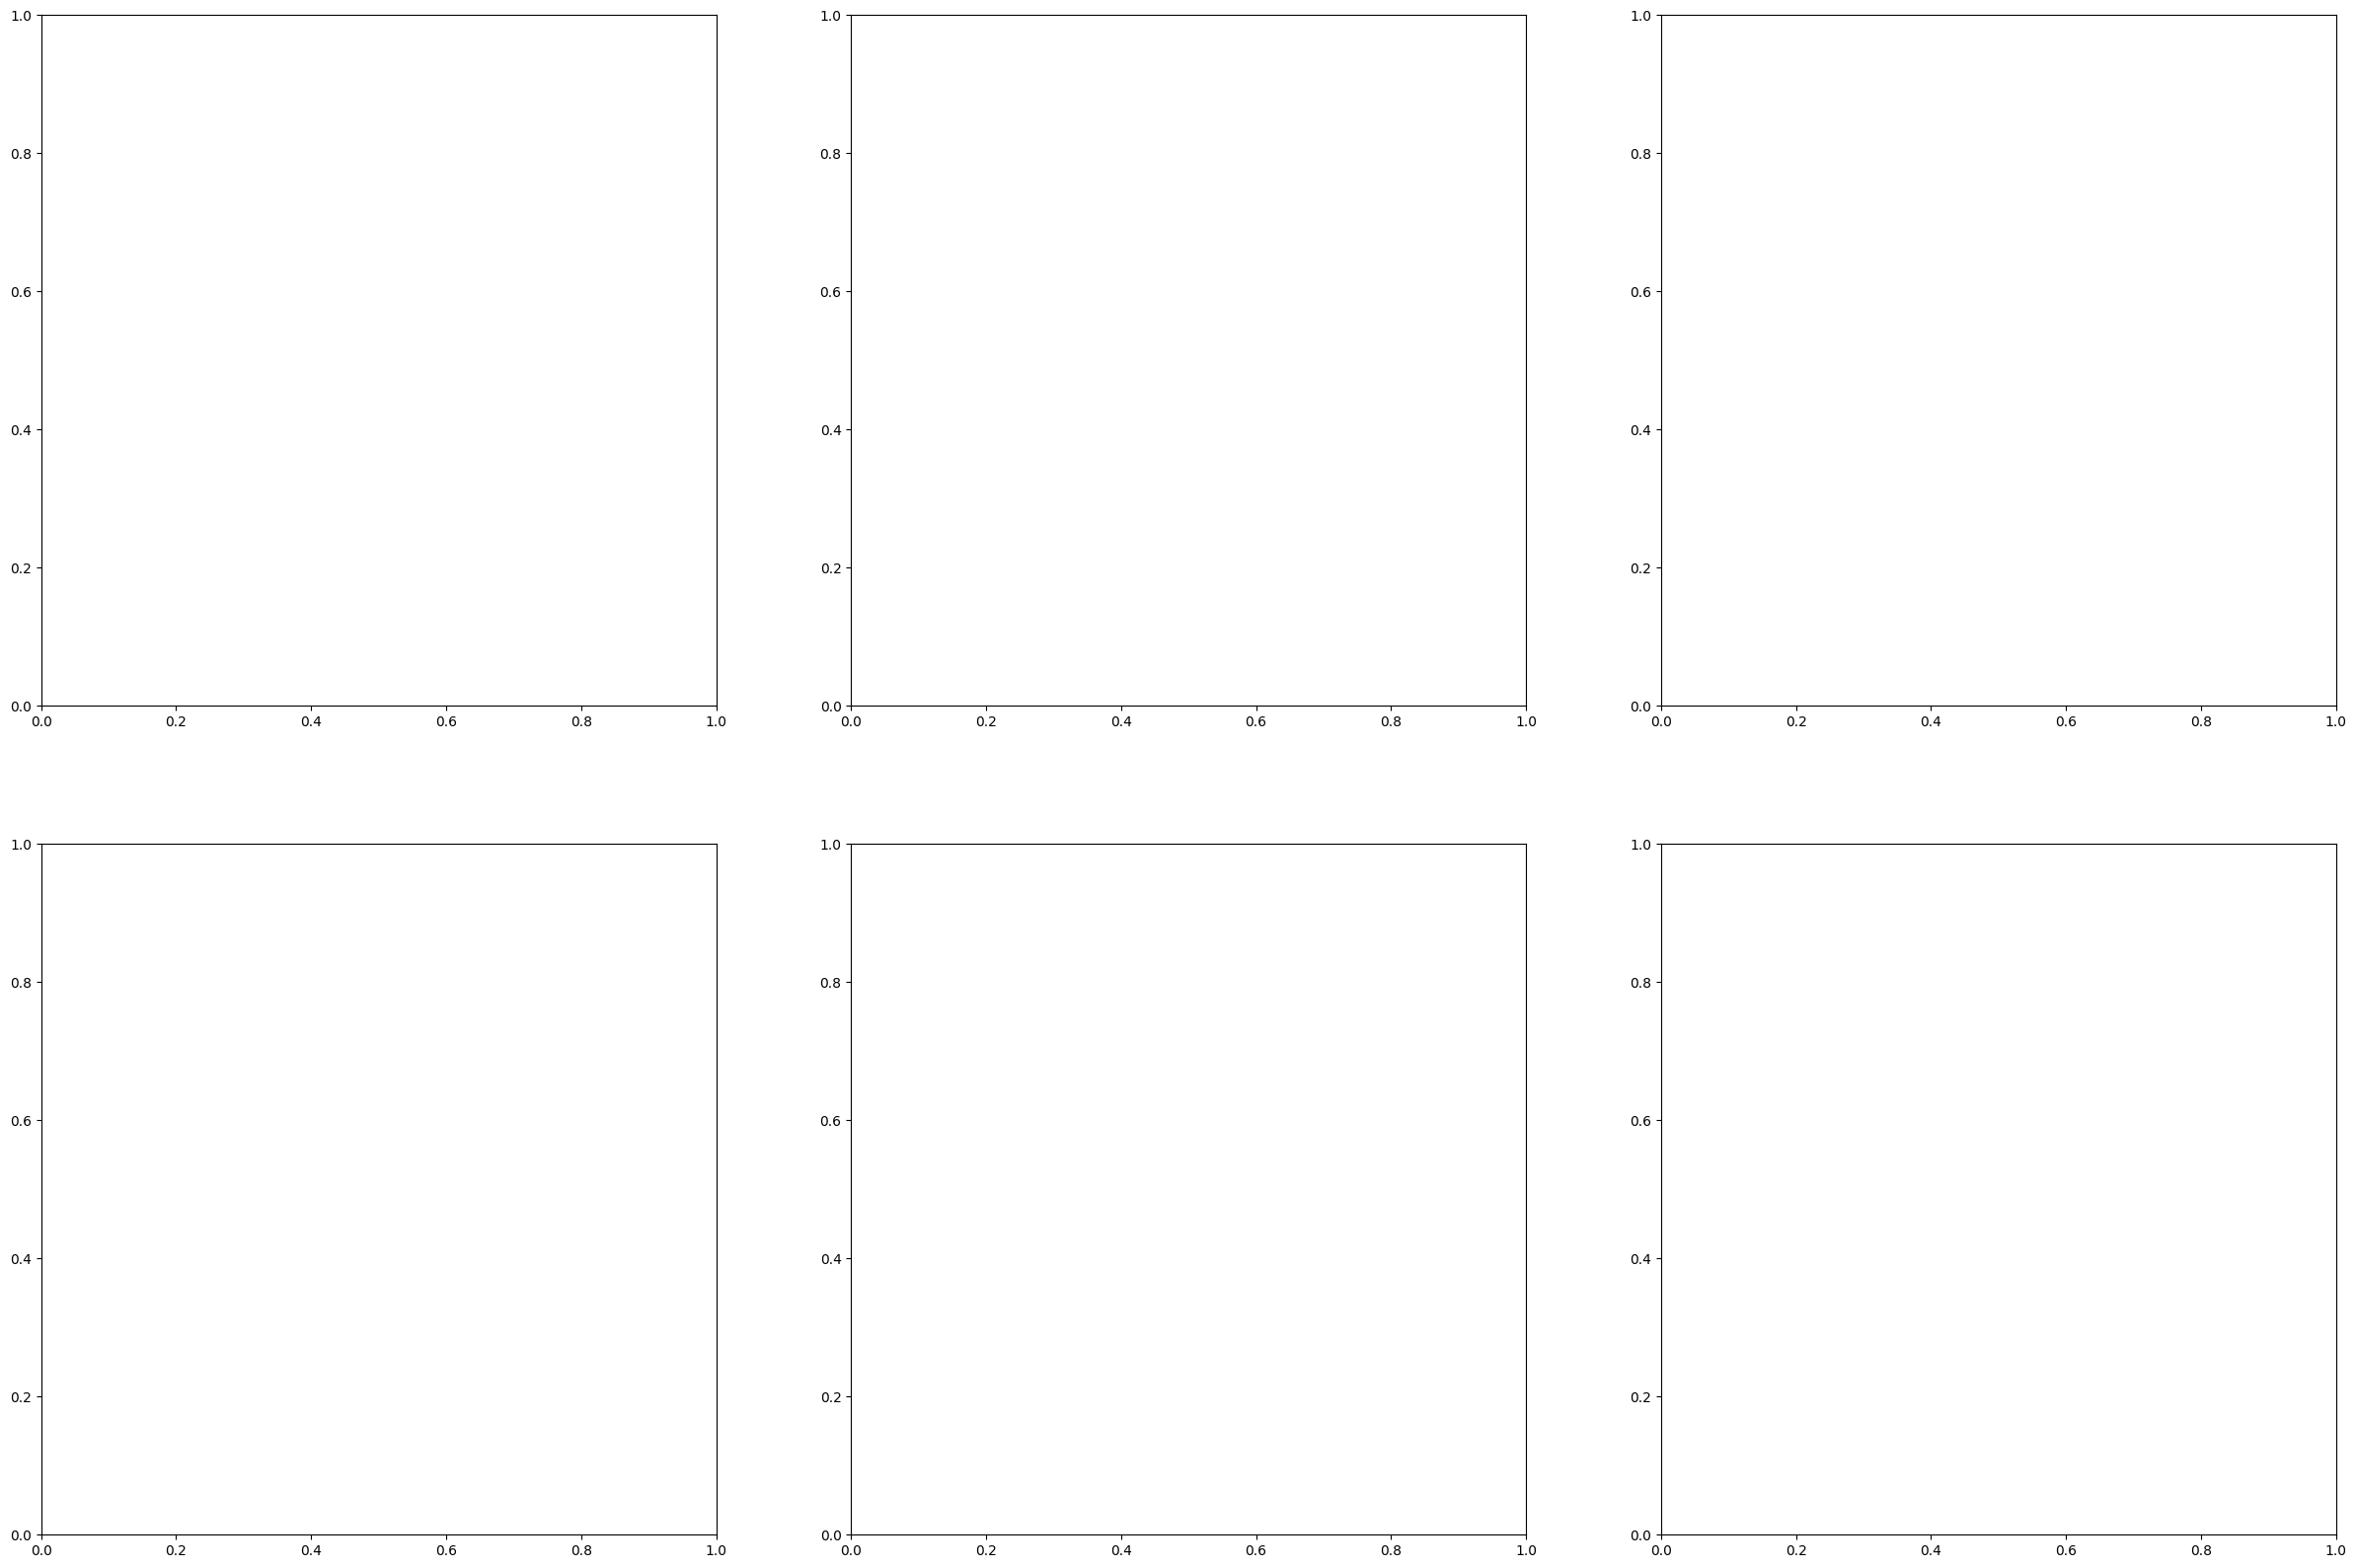

In [37]:
import esm
import torch
import matplotlib.pyplot as plt
from math import floor, ceil

sim_ind = 1
pdb_name = "4d81"

hmmer_score_cutoff_percentile = 0.5

device = "cuda" if torch.cuda.is_available() else "cpu"

msa_transformer, msa_transformer_alphabet = esm.pretrained.esm_msa1b_t12_100M_UR50S()
msa_transformer = msa_transformer.eval().to(device)
msa_transformer_batch_converter = msa_transformer_alphabet.get_batch_converter()

for mode in ["full","high_hmmer","low_hmmer"]:
    
    fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))

    for j,folder in enumerate(scores_folders):
    
        r = floor(j/3)
        c = j % 3
            
        for i,file in enumerate(os.listdir(folder)):
    
            torch.cuda.empty_cache()
    
            if tool_types[j] != "nat":
                file_sim_ind = file.split('.')[0]
                file_sim_ind = int(file_sim_ind.split('-')[1])
            else:
                file_sim_ind = sim_ind
    
            if file_sim_ind != sim_ind:
                continue
    
            file_path = os.path.join(folder,file)
            dist_dataframe = pd.DataFrame()
            
            df = pd.read_csv(file_path, delimiter="\t")
            
            seqs =  [(name, seq) for name,seq in zip(df["sequence_name"], df["sequence"])]
    
            _, _, batch_tokens = msa_transformer_batch_converter([seqs])
            batch_tokens = batch_tokens.to(next(msa_transformer.parameters()).device)
            msa_transformer_predictions = msa_transformer.predict_contacts(batch_tokens)[0].cpu()

            print(msa_transformer_predictions)
    
            metrics = {"id": "PF00004", "tool": tool_types[j], "mode":mode}
            metrics.update(evaluate_prediction(msa_transformer_predictions, contacts[pdb_name]))
            msa_transformer_results.append(metrics)
            
            del batch_tokens
            torch.cuda.empty_cache()
        
            # fig, axes = plt.subplots(figsize=(18, 6), ncols=)
            prediction = msa_transformer_predictions
            target = contacts
            plot_contacts_and_predictions(
                prediction, target, ax=axes[r][c], title = f"{mode}-{tool_types[j]}"
            )
    
    plt.show()

msa_transformer_results = pd.DataFrame(msa_transformer_results)        

## Hamming Distance Matrices (Arranged According to Tree Structure)

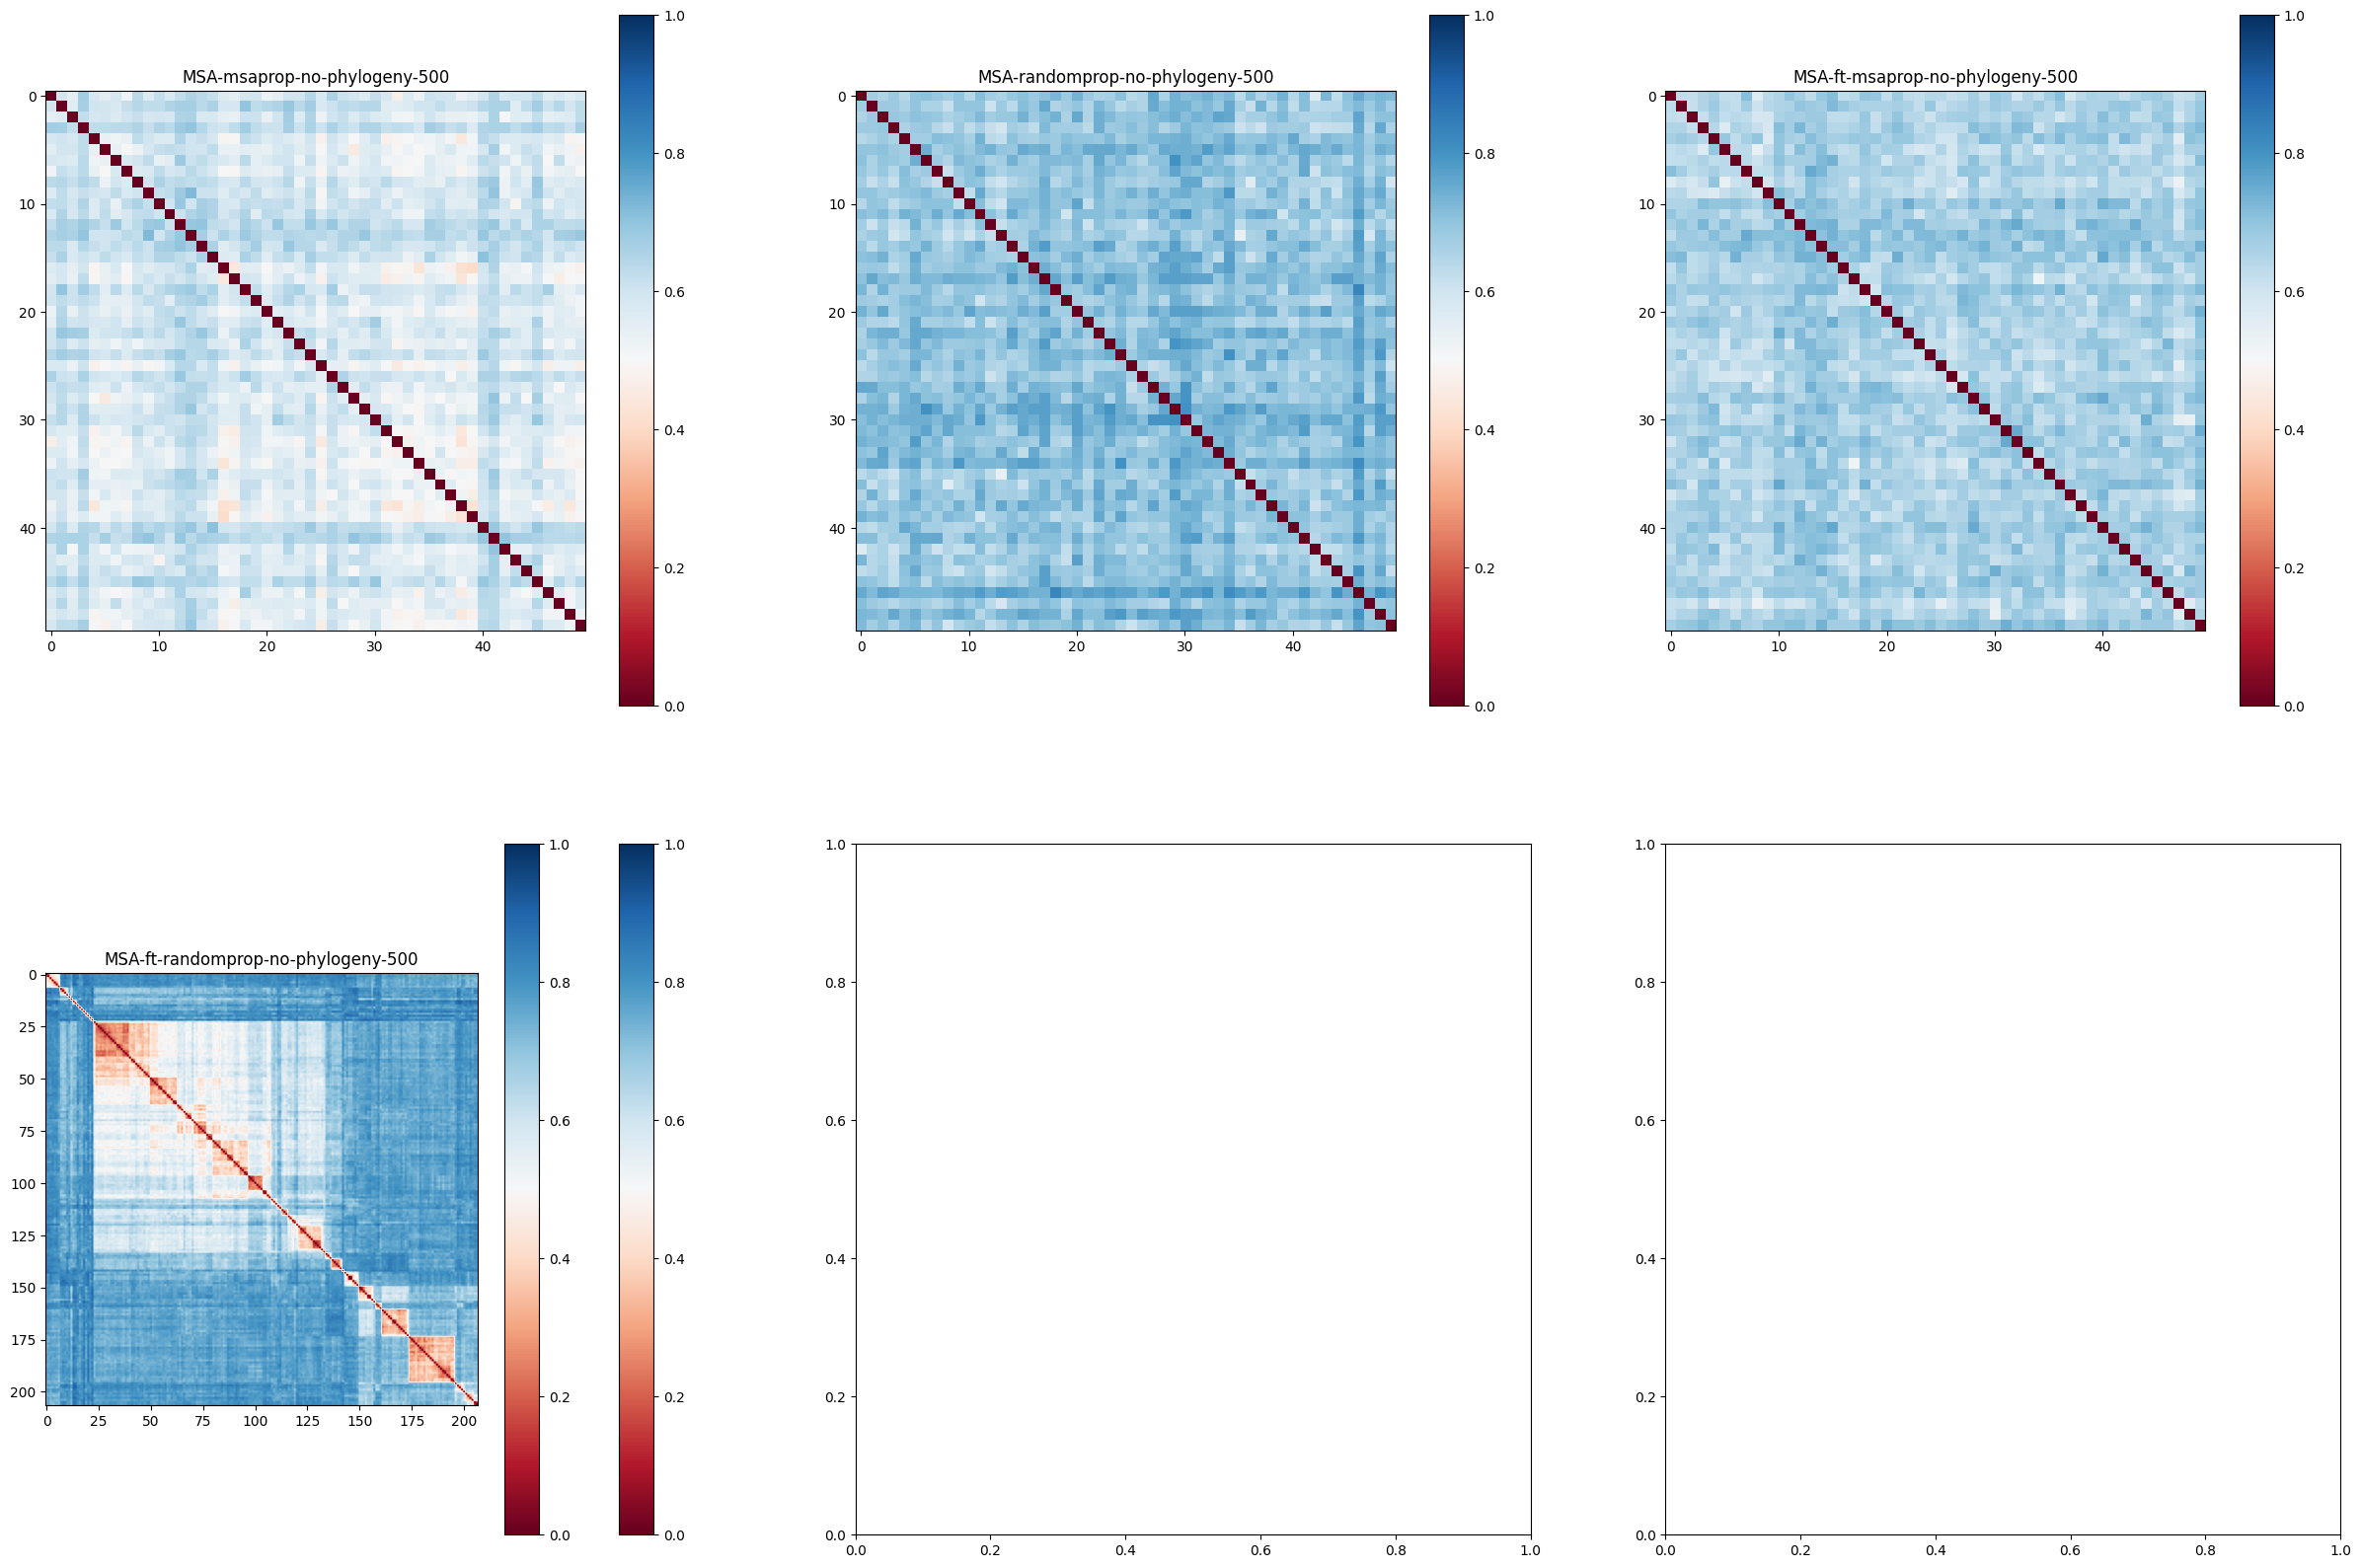

In [41]:
from math import floor,ceil
import matplotlib.pyplot as plt

nat_msa_path = "./data/protein-families-msa-seed/PF00004_seed_ordered.fasta"

fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))
sim_ind = 1

for j,folder in enumerate(msa_folders):

    r = floor(j/3)
    c = j % 3
        
    if tool_types[j] == "nat":
        continue
        
    for i,file in enumerate(os.listdir(folder)):

        if tool_types[j] != "nat":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = sim_ind

        if file_sim_ind != sim_ind:
            continue

        file_path = os.path.join(folder,file)
        dist_dataframe = pd.DataFrame()

        all_seqs = [(record.description, remove_insertions(str(record.seq))) for record in SeqIO.parse(file_path, "fasta")]
                
        num_sim_array = np.array([list(seq[1]) for seq in all_seqs], dtype=np.bytes_).view(np.uint8)
        distance_matrix_sim = cdist(num_sim_array,num_sim_array, "hamming") 
    
        a = axes[r][c].imshow(distance_matrix_sim,cmap='RdBu', vmin=0, vmax=1)
        axes[r][c].set_title(tool_types[j])

        cbar = fig.colorbar(a, ax=axes[r][c])

all_nat_seqs = [(record.description, remove_insertions(str(record.seq))) for record in SeqIO.parse(nat_msa_path, "fasta")]

num_nat_array = np.array([list(seq[1]) for seq in all_nat_seqs], dtype=np.bytes_).view(np.uint8)
distance_matrix_nat = cdist(num_nat_array,num_nat_array, "hamming")

a = axes[r][c].imshow(distance_matrix_nat,cmap='RdBu', vmin=0, vmax=1)
axes[r][c].set_title(tool_types[j])

cbar = fig.colorbar(a, ax=axes[r][c])

plt.savefig(f"hamming_distance_matrices_sim_{sim_ind}")

plt.show()

## Analyzing Clade Differences?

In [86]:
def clade_assigner(clade_root, all_nat_seqs_dict):

    output = []
    clade_id_counter = 0
    clade_id_list = [0]
    dummy_clade_array = []
    
    def clade_assigner_recur(tree_root, all_nat_seqs_dict, clade_id_list):
    
        b = tree_root.clades

        dummy_clade_array.append(0)
        
        if len(b)>0:
             
            for clade in b:               
     
                clade_assigner_recur(clade, all_nat_seqs_dict, clade_id_list + [len(dummy_clade_array)]) 
                
        else:
            counter = len(output)
            output.append({"corr_nat_seq_name":tree_root.name, 
                           "corr_nat_seq":all_nat_seqs_dict[tree_root.name], "clade_ids":clade_id_list})

    clade_assigner_recur(clade_root, all_nat_seqs_dict, clade_id_list)

    return pd.DataFrame(output)

### Hamming Distances separated by clades

In [88]:
main_dataframe = pd.DataFrame(columns=["tool","sim_ind","clade_id","ham_dist_sim","ham_dist_corr_nat"])

depth = 1

nat_file_path = "./data/protein-families-msa-seed/PF00004_seed.fasta"
all_nat_seqs = [(record.description, remove_insertions(str(record.seq))) for record in SeqIO.parse(nat_file_path, "fasta")] 

clade_ids_df = clade_assigner(tree.clade, dict(all_nat_seqs))
clade_ids_df[f"clade_id_depth_{depth}"] = [clade_ids[depth] for clade_ids in clade_ids_df["clade_ids"]]

for j,folder in enumerate(msa_folders):
        
    for i,file in enumerate(os.listdir(folder)):

        if tool_types[j] == "nat" and file == "PF00004_seed.fasta":
            continue
            
        if tool_types[j] != "nat":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = 1
        
        file_path = os.path.join(folder,file)

        all_seqs = [(record.description, remove_insertions(str(record.seq))) for record in SeqIO.parse(file_path, "fasta")]
        
        
        df = pd.DataFrame(all_seqs, columns=["seq_name","sequence"])

        df = pd.concat((df,clade_ids_df), axis = 1).reset_index(drop = True)
    
        for clade_id in list(df[f"clade_id_depth_{depth}"].unique()):

            dist_dataframe = pd.DataFrame()

            df_clade = df.loc[df[f"clade_id_depth_{depth}"] == clade_id,:]
            
            num_sim_array = np.array([list(seq) for seq in df_clade["sequence"]], dtype=np.bytes_).view(np.uint8)
            
            distance_matrix_sim = cdist(num_sim_array,num_sim_array, "hamming")
            pairwise_distances_sim = distance_matrix_sim[np.triu_indices_from(distance_matrix_sim, k=1)]
    
            num_nat_array = np.array([list(seq) for seq in df_clade["corr_nat_seq"]], dtype=np.bytes_).view(np.uint8)
            
            distance_matrix_nat = cdist(num_nat_array,num_nat_array, "hamming")
            pairwise_distances_nat = distance_matrix_nat[np.triu_indices_from(distance_matrix_nat, k=1)]
    
            dist_dataframe["ham_dist_sim"] = list(pairwise_distances_sim)
            dist_dataframe["ham_dist_corr_nat"] = list(pairwise_distances_nat)
   
            dist_dataframe["tool"] = tool_types[j]
            dist_dataframe["sim_ind"] = i + 1
            dist_dataframe["clade_id"] = clade_id
            
            main_dataframe = pd.concat((main_dataframe, dist_dataframe)).reset_index(drop=True)

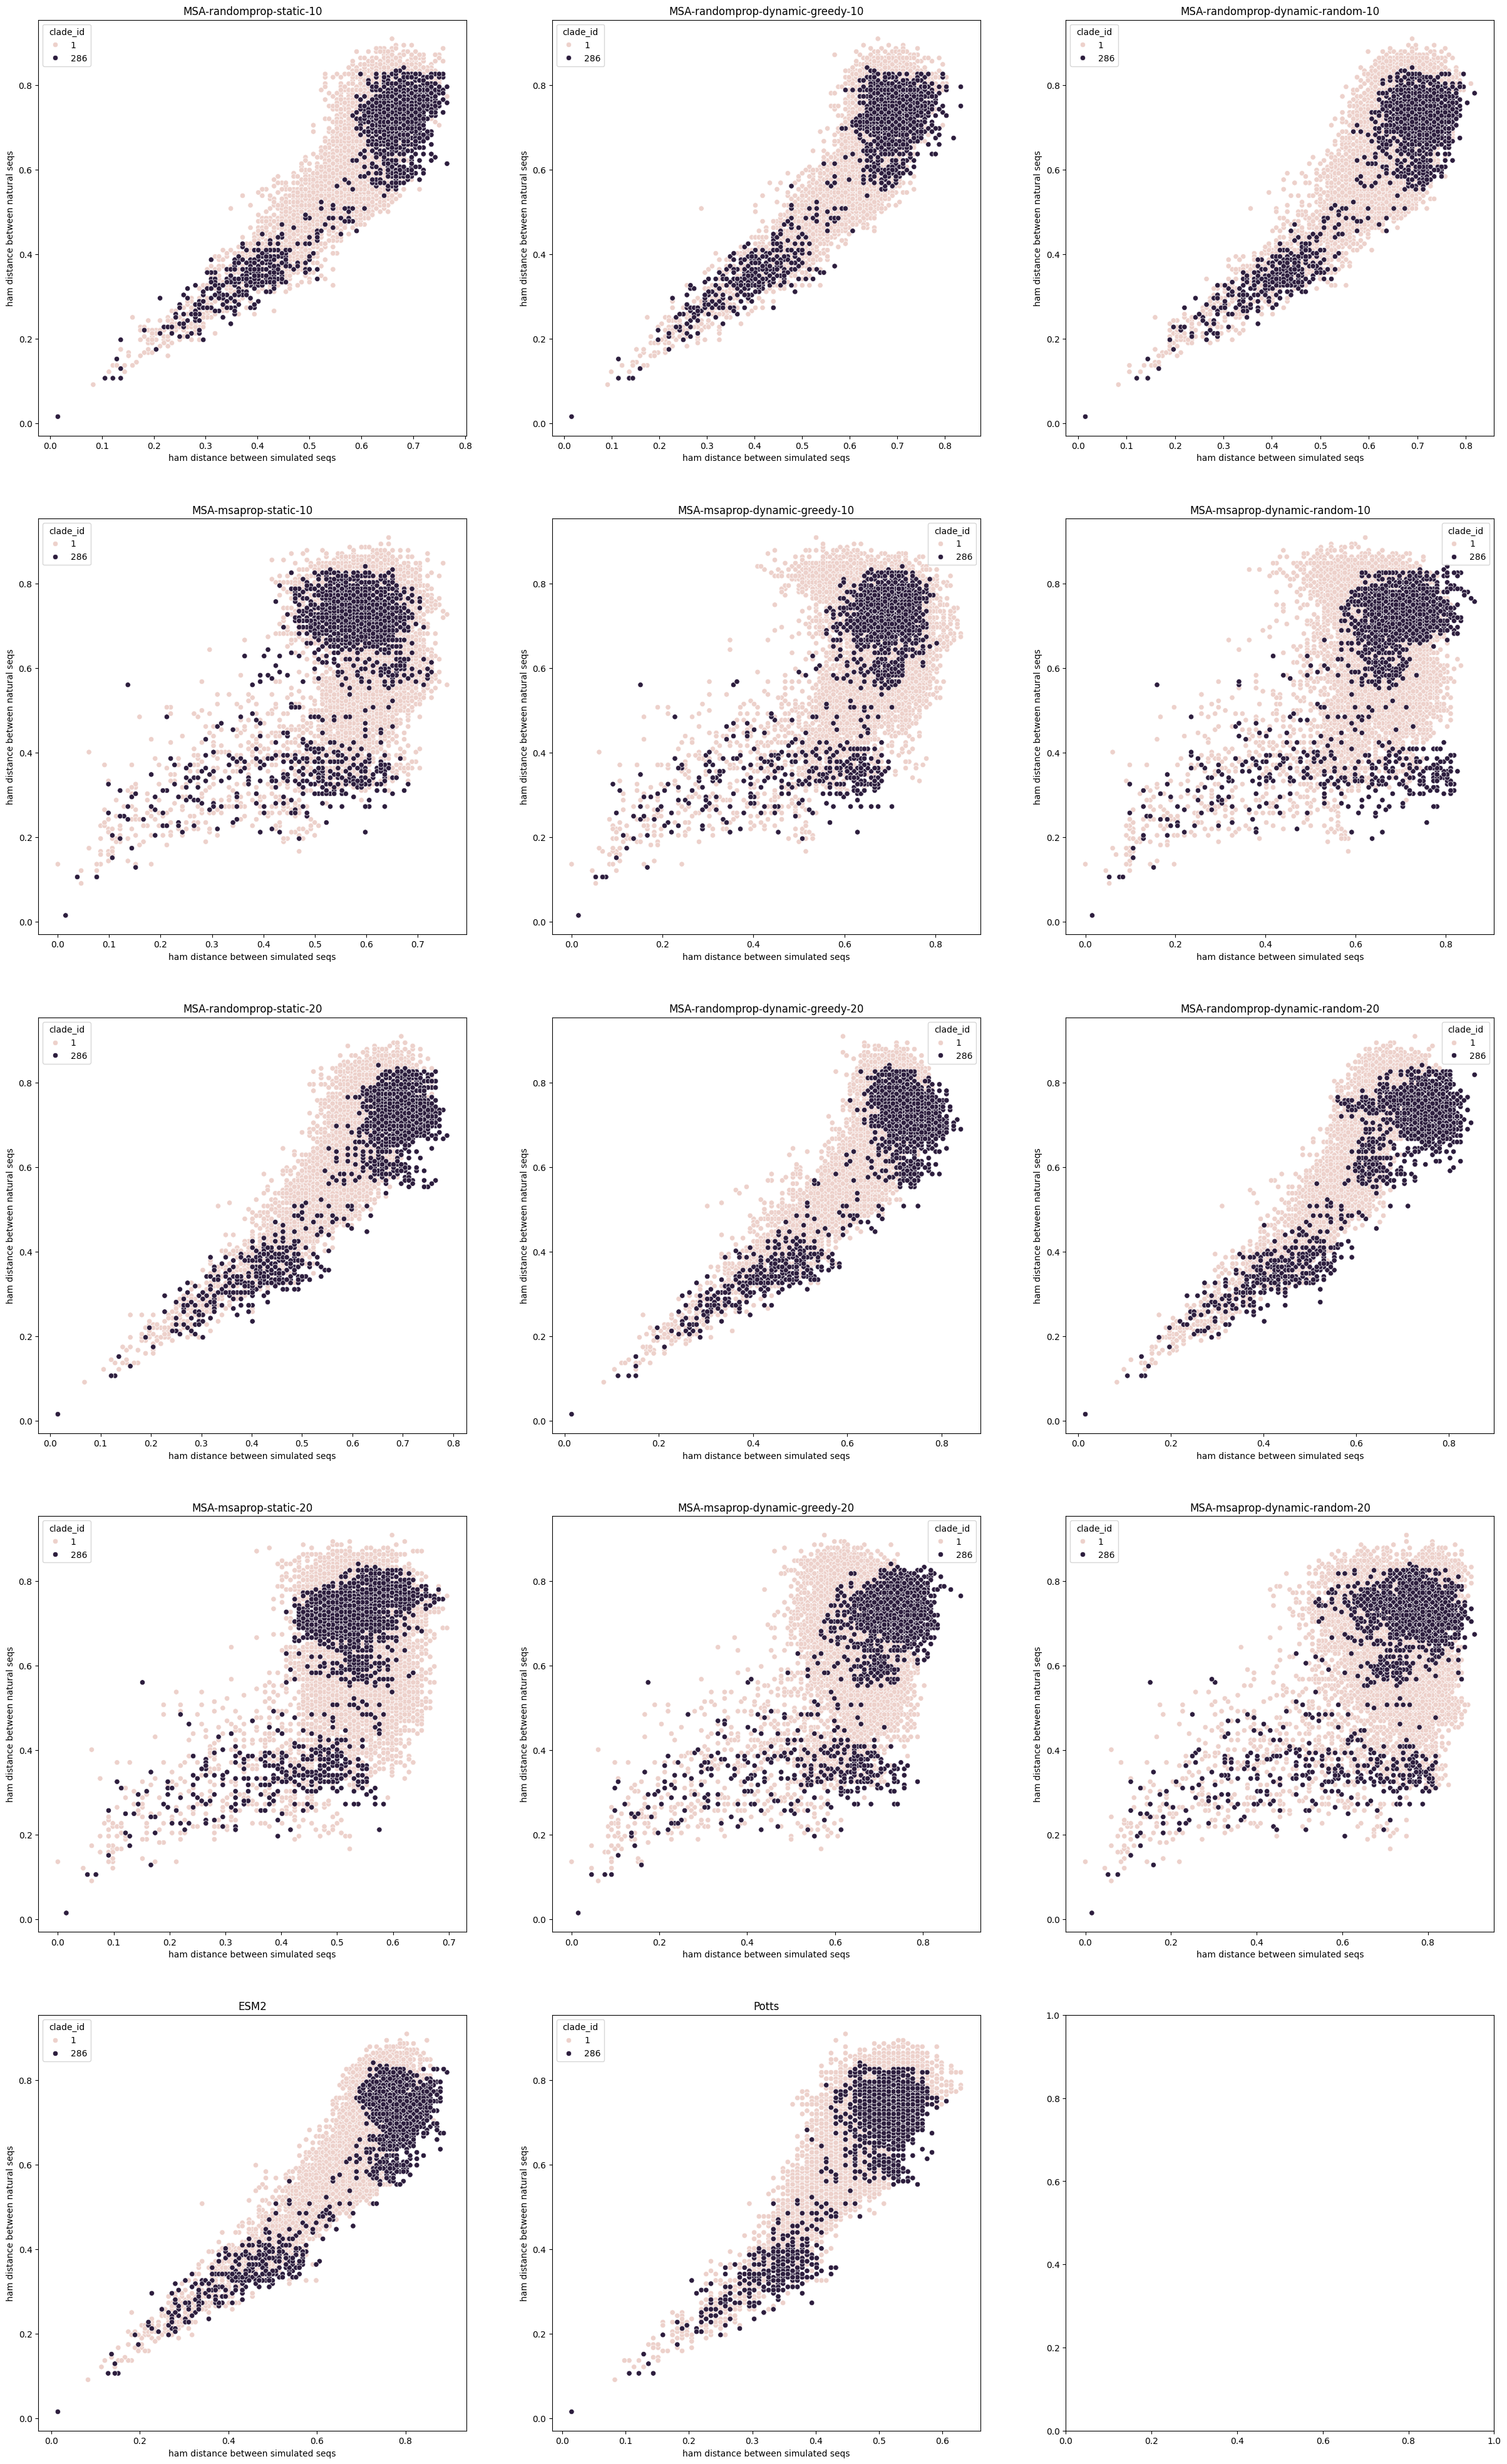

In [89]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import floor,ceil

fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))
sim_ind = 1

for k in range(len(tool_types)):

    if tool_types[k] == "nat":
        continue

    i = floor(k/3)
    j = k % 3
    
    main_dataframe_tool_sim = main_dataframe.loc[(main_dataframe["tool"] == tool_types[k]) & (main_dataframe["sim_ind"] == sim_ind), :]
    
    sns.scatterplot(x = "ham_dist_sim", y = "ham_dist_corr_nat", 
                               data = main_dataframe_tool_sim, hue = "clade_id", ax=axes[i][j], alpha = 1)
    axes[i][j].set_title(tool_types[k])
    axes[i][j].set_xlabel("ham distance between simulated seqs")
    axes[i][j].set_ylabel("ham distance between natural seqs")
    # pearson_corr = pearsonr(main_dataframe_tool_sim["ham_dist_sim"], main_dataframe_tool_sim["ham_dist_corr_nat"])
    # axes[i][j].annotate(f"pearson_corr = {pearson_corr.statistic:.2f}",xy = (0.1,0.9), xycoords = "axes fraction")

plt.savefig(f"ham_distances_scatterplots_depth_{depth}.png")